In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

In [2]:
from google.colab import files
uploaded = files.upload()

# Select the file to open
file_name = list(uploaded.keys())[0]


url = 'D:\master program\Sem1\machine learning\group project\\training_data.csv'
df = pd.read_csv(file_name)
df


Saving training_data.csv to training_data.csv


hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
1595            3            5      6        0        0           1  21.5   
1596           14            0      6        0        1           1  23.2   
1597           13            0      3        0        1           1  13.9   
1598           14            5      3        0        0           1  11.7   
1599           22            6      2        0        0           0   4.2   

       dew  humidity  precip  snow  snowdepth  windspeed  cloudcover  \
0    -15.0     53.68   0.000     0        0.0       16.3        31.6   
1    -12.8     40.97   0.000     0        0.0       23.9        85.7   
2     21.8     73.39   0.000     0        0.0        0.0        81.1   
3     -4.0     59.74   0.000     0        0.0       19.2         0.0   
4    -11.4     18.71   0.000     0        0.0       10.5        44.6   
...    ...       ...     ...   ...        ...        ...         ...   
1595  19.4     87.68   0.000     0        0.0       10.6        24.4   
1596  20.1     82.43   2.217     0        0.0        9.8        92.1   
1597  -2.2     32.93   0.000     0        2.0       18.2        79.3   
1598  -9.3     22.09   0.000     0        0.0        5.8        24.4   
1599   1.7     84.11   1.081     0        0.0       21.9        97.4   

      visibility    increase_stock  
0           16.0   low_bike_demand  
1           16.0   low_bike_demand  
2           16.0   low_bike_demand  
3           16.0   low_bike_demand  
4           16.0   low_bike_demand  
...          ...               ...  
1595        16.0   low_bike_demand  
1596        10.4   low_bike_demand  
1597        16.0   low_bike_demand  
1598        16.0  high_bike_demand  
1599        16.0   low_bike_demand  

[1600 rows x 16 columns]

In [17]:
df.shape


(1600, 16)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [5]:
df.describe()


hour_of_day  day_of_week        month      holiday      weekday  \
count   1600.00000  1600.000000  1600.000000  1600.000000  1600.000000   
mean      11.37125     3.022500     6.468750     0.033125     0.710000   
std        6.94837     2.012965     3.454741     0.179019     0.453904   
min        0.00000     0.000000     1.000000     0.000000     0.000000   
25%        5.00000     1.000000     3.000000     0.000000     0.000000   
50%       12.00000     3.000000     6.000000     0.000000     1.000000   
75%       17.00000     5.000000     9.000000     0.000000     1.000000   
max       23.00000     6.000000    12.000000     1.000000     1.000000   

       summertime         temp          dew     humidity       precip    snow  \
count  1600.00000  1600.000000  1600.000000  1600.000000  1600.000000  1600.0   
mean      0.64375    15.210313     7.750750    63.927844     0.122042     0.0   
std       0.47904     9.264785    10.026459    19.079419     0.920600     0.0   
min       0.00000    -9.100000   -18.400000    15.850000     0.000000     0.0   
25%       0.00000     7.700000    -0.800000    47.845000     0.000000     0.0   
50%       1.00000    15.500000     8.300000    65.175000     0.000000     0.0   
75%       1.00000    23.200000    16.800000    79.955000     0.000000     0.0   
max       1.00000    35.600000    24.300000    99.890000    25.871000     0.0   

         snowdepth    windspeed   cloudcover   visibility  
count  1600.000000  1600.000000  1600.000000  1600.000000  
mean      0.042713    13.082500    64.322375    15.344125  
std       0.421198     7.756652    32.748869     2.323737  
min       0.000000     0.000000     0.000000     0.100000  
25%       0.000000     7.500000    28.800000    16.000000  
50%       0.000000    12.300000    79.300000    16.000000  
75%       0.000000    17.600000    92.800000    16.000000  
max       6.710000    43.800000   100.000000    16.000000

In [19]:
df.columns


Index(['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday',
       'summertime', 'temp', 'dew', 'humidity', 'precip', 'snow', 'snowdepth',
       'windspeed', 'cloudcover', 'visibility', 'increase_stock'],
      dtype='object')

In [ ]:
df.isnull()

hour_of_day  day_of_week  month  holiday  weekday  summertime   temp  \
0           False        False  False    False    False       False  False   
1           False        False  False    False    False       False  False   
2           False        False  False    False    False       False  False   
3           False        False  False    False    False       False  False   
4           False        False  False    False    False       False  False   
...           ...          ...    ...      ...      ...         ...    ...   
1595        False        False  False    False    False       False  False   
1596        False        False  False    False    False       False  False   
1597        False        False  False    False    False       False  False   
1598        False        False  False    False    False       False  False   
1599        False        False  False    False    False       False  False   

        dew  humidity  precip   snow  snowdepth  windspeed  cloudcover  \
0     False     False   False  False      False      False       False   
1     False     False   False  False      False      False       False   
2     False     False   False  False      False      False       False   
3     False     False   False  False      False      False       False   
4     False     False   False  False      False      False       False   
...     ...       ...     ...    ...        ...        ...         ...   
1595  False     False   False  False      False      False       False   
1596  False     False   False  False      False      False       False   
1597  False     False   False  False      False      False       False   
1598  False     False   False  False      False      False       False   
1599  False     False   False  False      False      False       False   

      visibility  increase_stock  
0          False           False  
1          False           False  
2          False           False  
3          False           False  
4          False           False  
...          ...             ...  
1595       False           False  
1596       False           False  
1597       False           False  
1598       False           False  
1599       False           False  

[1600 rows x 16 columns]

[[<Axes: title={'center': 'hour_of_day'}>]]
Axes(0.125,0.11;0.775x0.77)
0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0


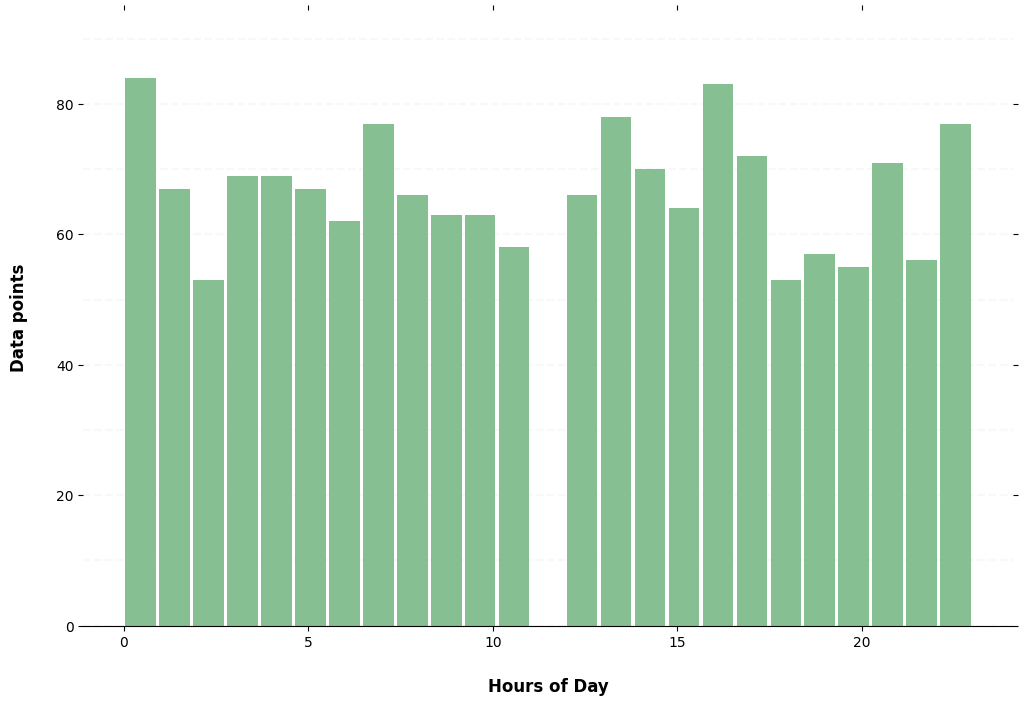

In [ ]:
from matplotlib.ticker import StrMethodFormatter

plt = df.hist(column='hour_of_day', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
print(plt)

ax = plt[0]
for x in ax:
    print(x)

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        print(tick)
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Hours of Day", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Data points", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [ ]:
df.groupby(['snow'])['increase_stock'].value_counts()

snow  increase_stock  
0     low_bike_demand     1312
      high_bike_demand     288
Name: increase_stock, dtype: int64

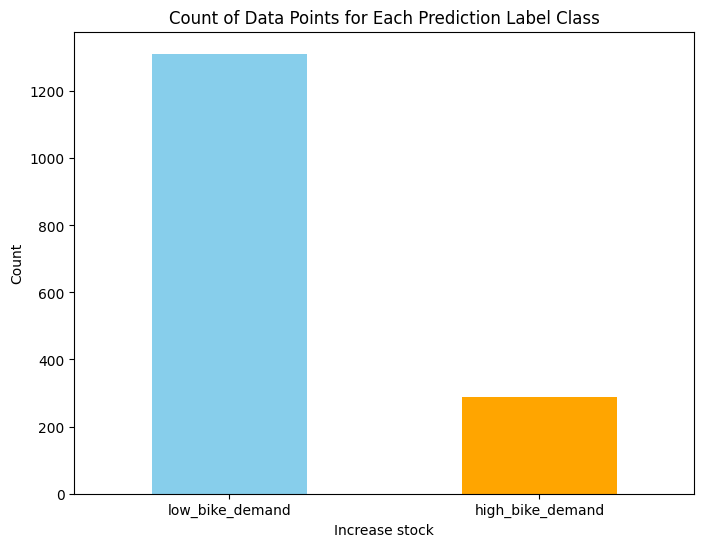

In [ ]:
import matplotlib.pyplot as plt
prediction_label_counts = df['increase_stock'].value_counts()

# Plotting the count of data points for each class in a bar chart
prediction_label_counts.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 6))  # Specify colors for each class
plt.title('Count of Data Points for Each Prediction Label Class')
plt.xlabel('Increase stock')
plt.ylabel('Count')
plt.xticks(rotation=0)  # No rotation for two classes
plt.show()

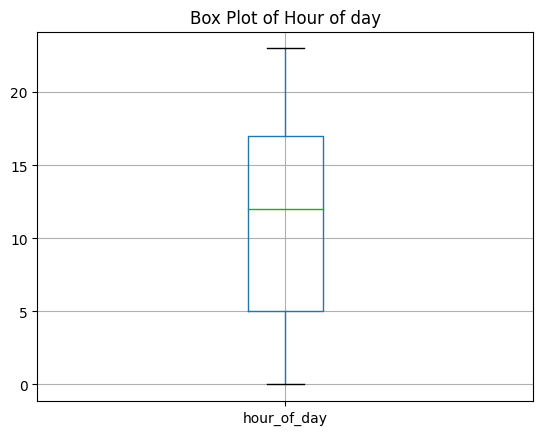

In [ ]:
df.boxplot(column='hour_of_day')
plt.title('Box Plot of Hour of day')
plt.show()

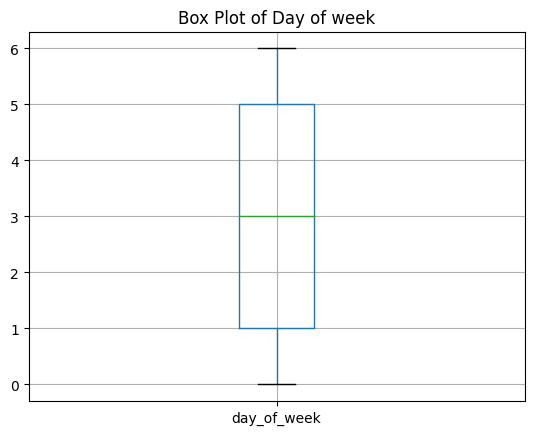

In [ ]:
df.boxplot(column='day_of_week')
plt.title('Box Plot of Day of week')
plt.show()

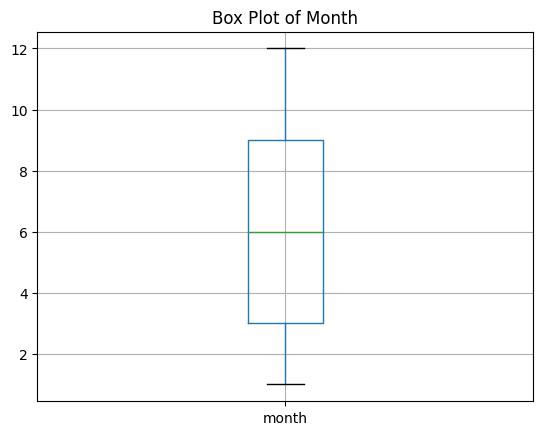

In [ ]:
df.boxplot(column='month')
plt.title('Box Plot of Month')
plt.show()

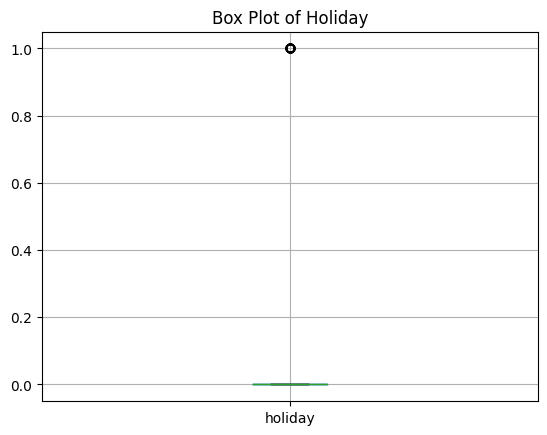

In [ ]:
df.boxplot(column='holiday')
plt.title('Box Plot of Holiday')
plt.show()

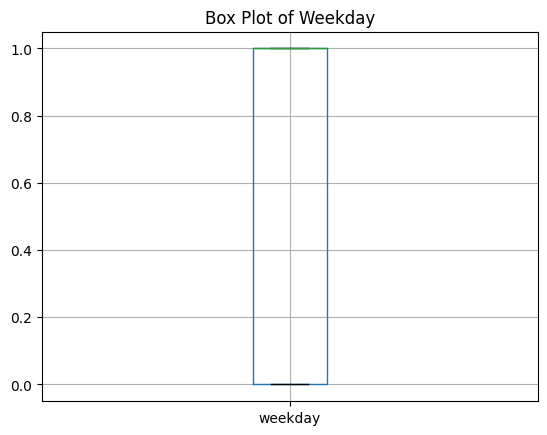

In [ ]:
df.boxplot(column='weekday')
plt.title('Box Plot of Weekday')
plt.show()

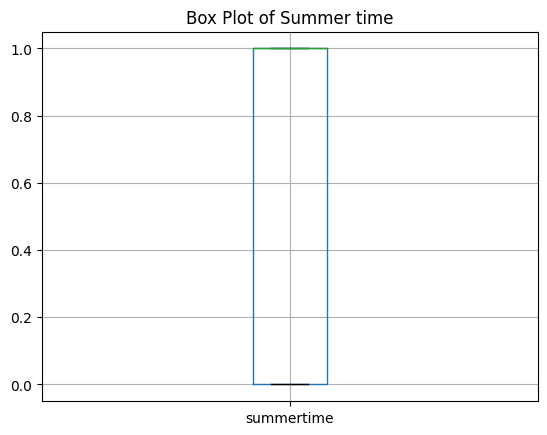

In [ ]:
df.boxplot(column='summertime')
plt.title('Box Plot of Summer time')
plt.show()

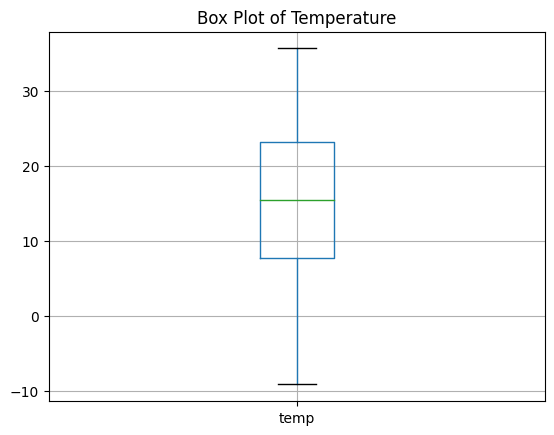

In [ ]:
df.boxplot(column='temp')
plt.title('Box Plot of Temperature')
plt.show()

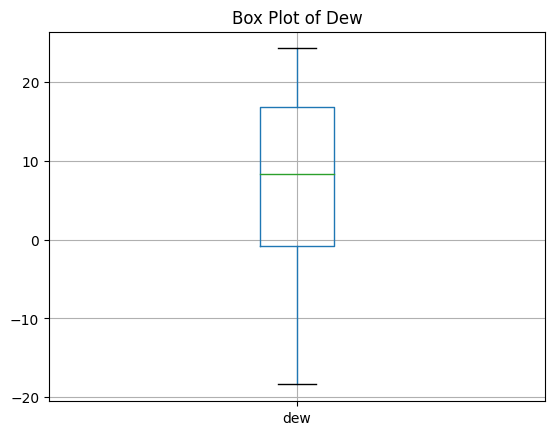

In [ ]:
df.boxplot(column='dew')
plt.title('Box Plot of Dew')
plt.show()

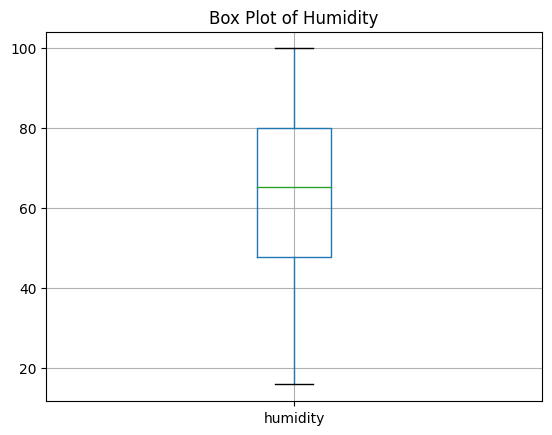

In [ ]:
df.boxplot(column='humidity')
plt.title('Box Plot of Humidity')
plt.show()

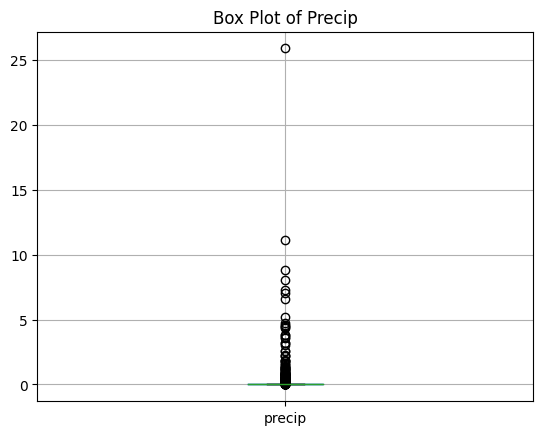

In [20]:
df.boxplot(column='precip')
plt.title('Box Plot of Precip')
plt.show()

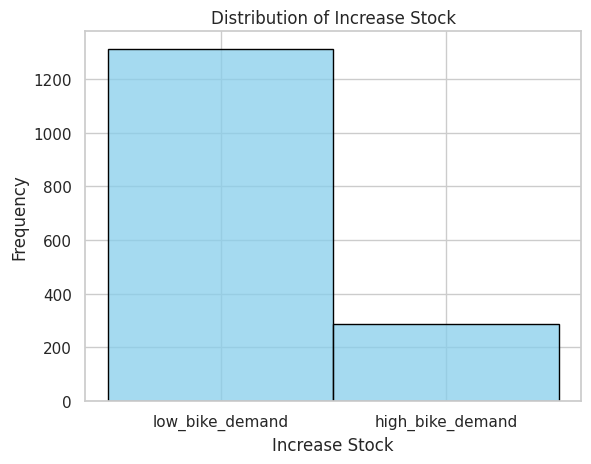

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
increase_stock_categories = df['increase_stock']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for the "increase_stock" column
sns.histplot(data=df, x='increase_stock', color='skyblue', edgecolor='black', discrete=True)

# Adding labels and title
plt.xlabel('Increase Stock')
plt.ylabel('Frequency')
plt.title('Distribution of Increase Stock')

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


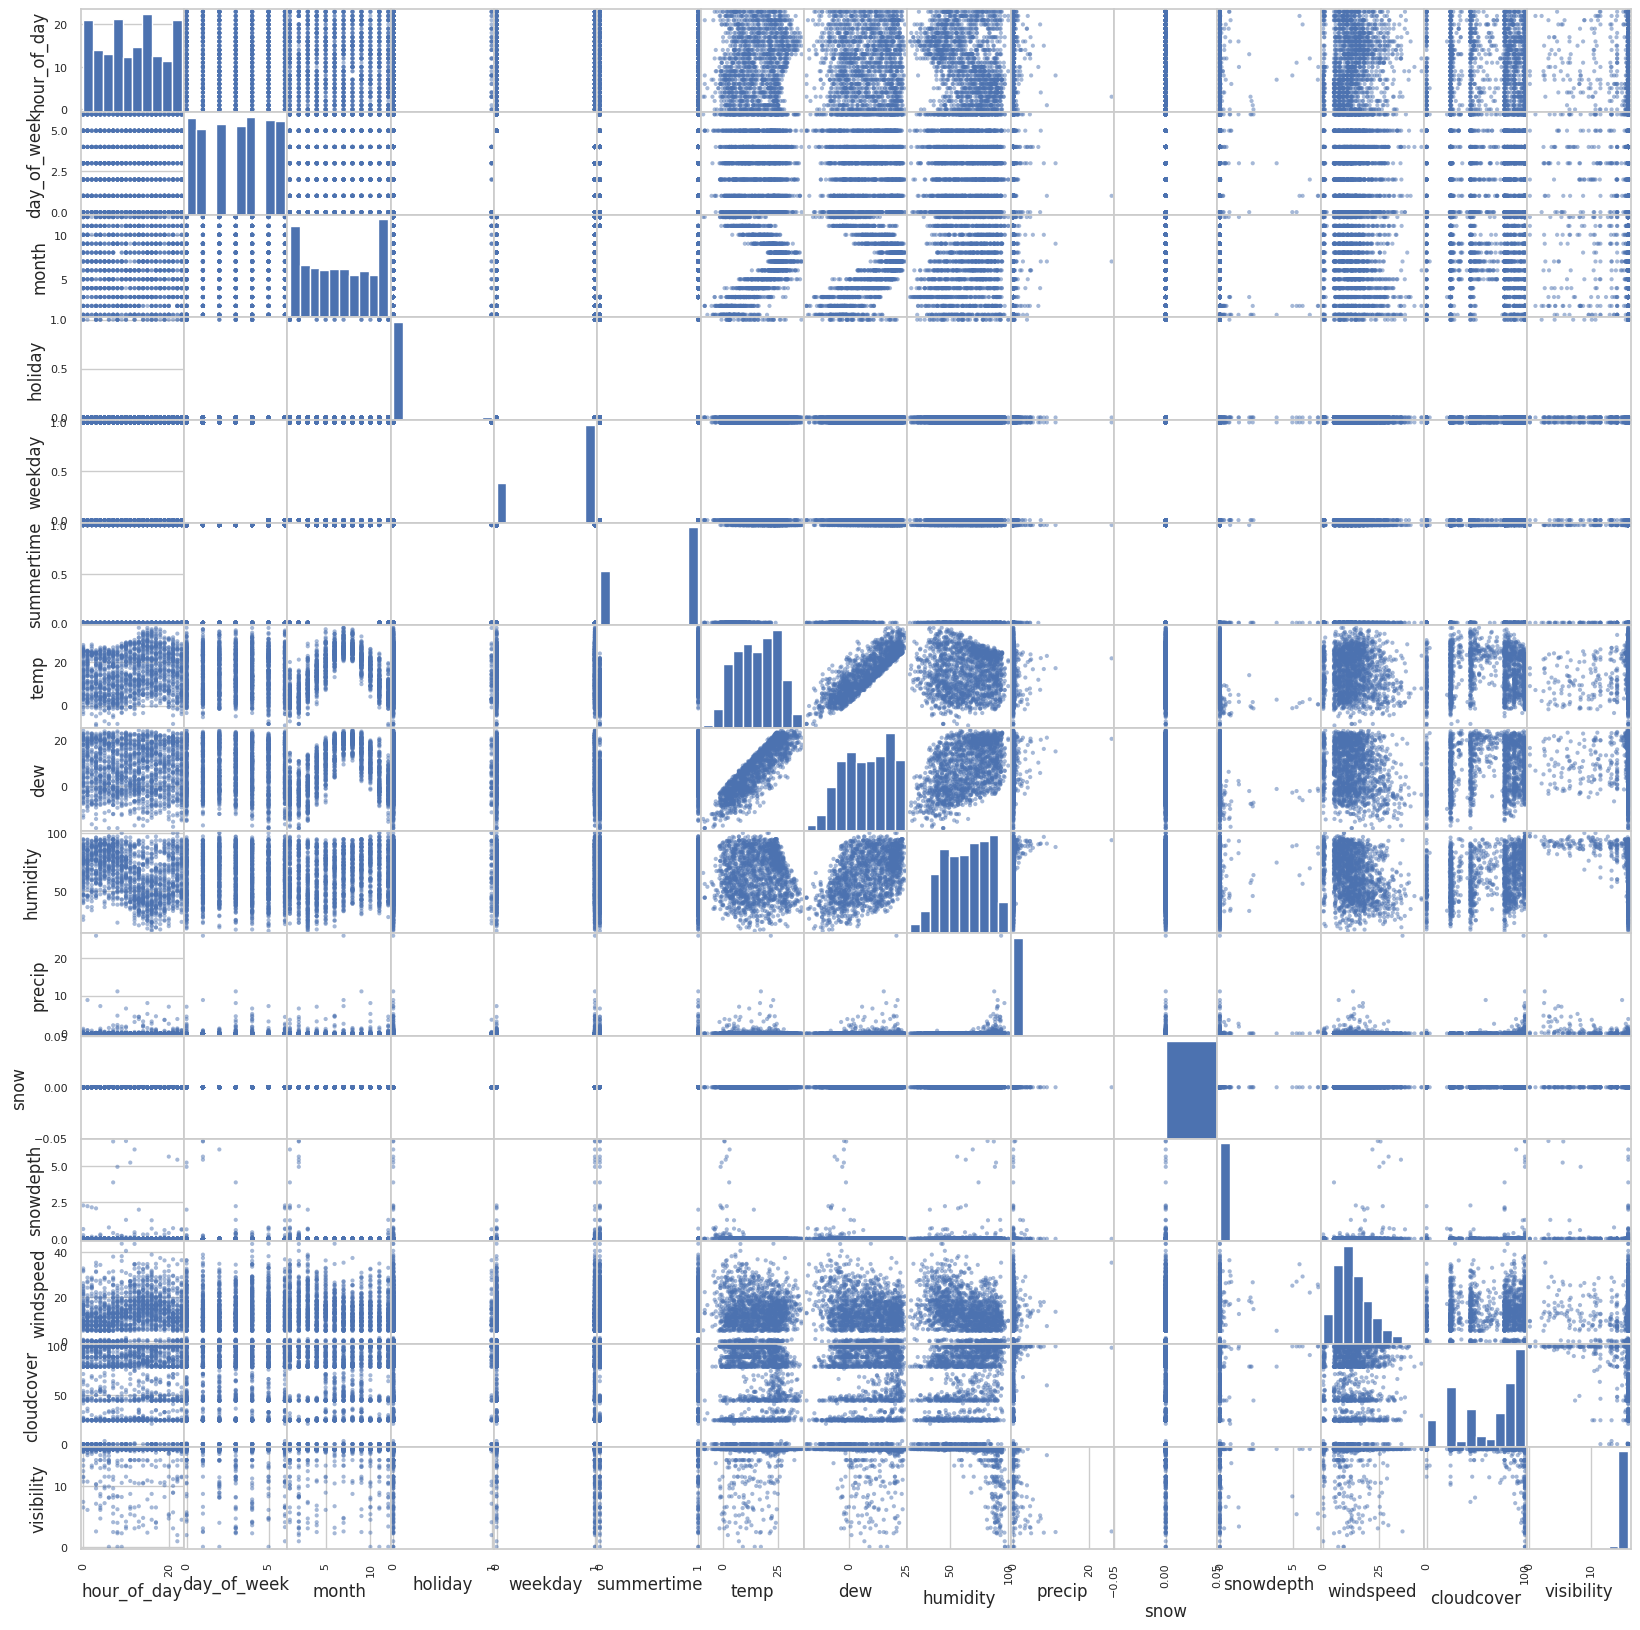

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
scatter_matrix(df, figsize=(20, 20))
plt.show()


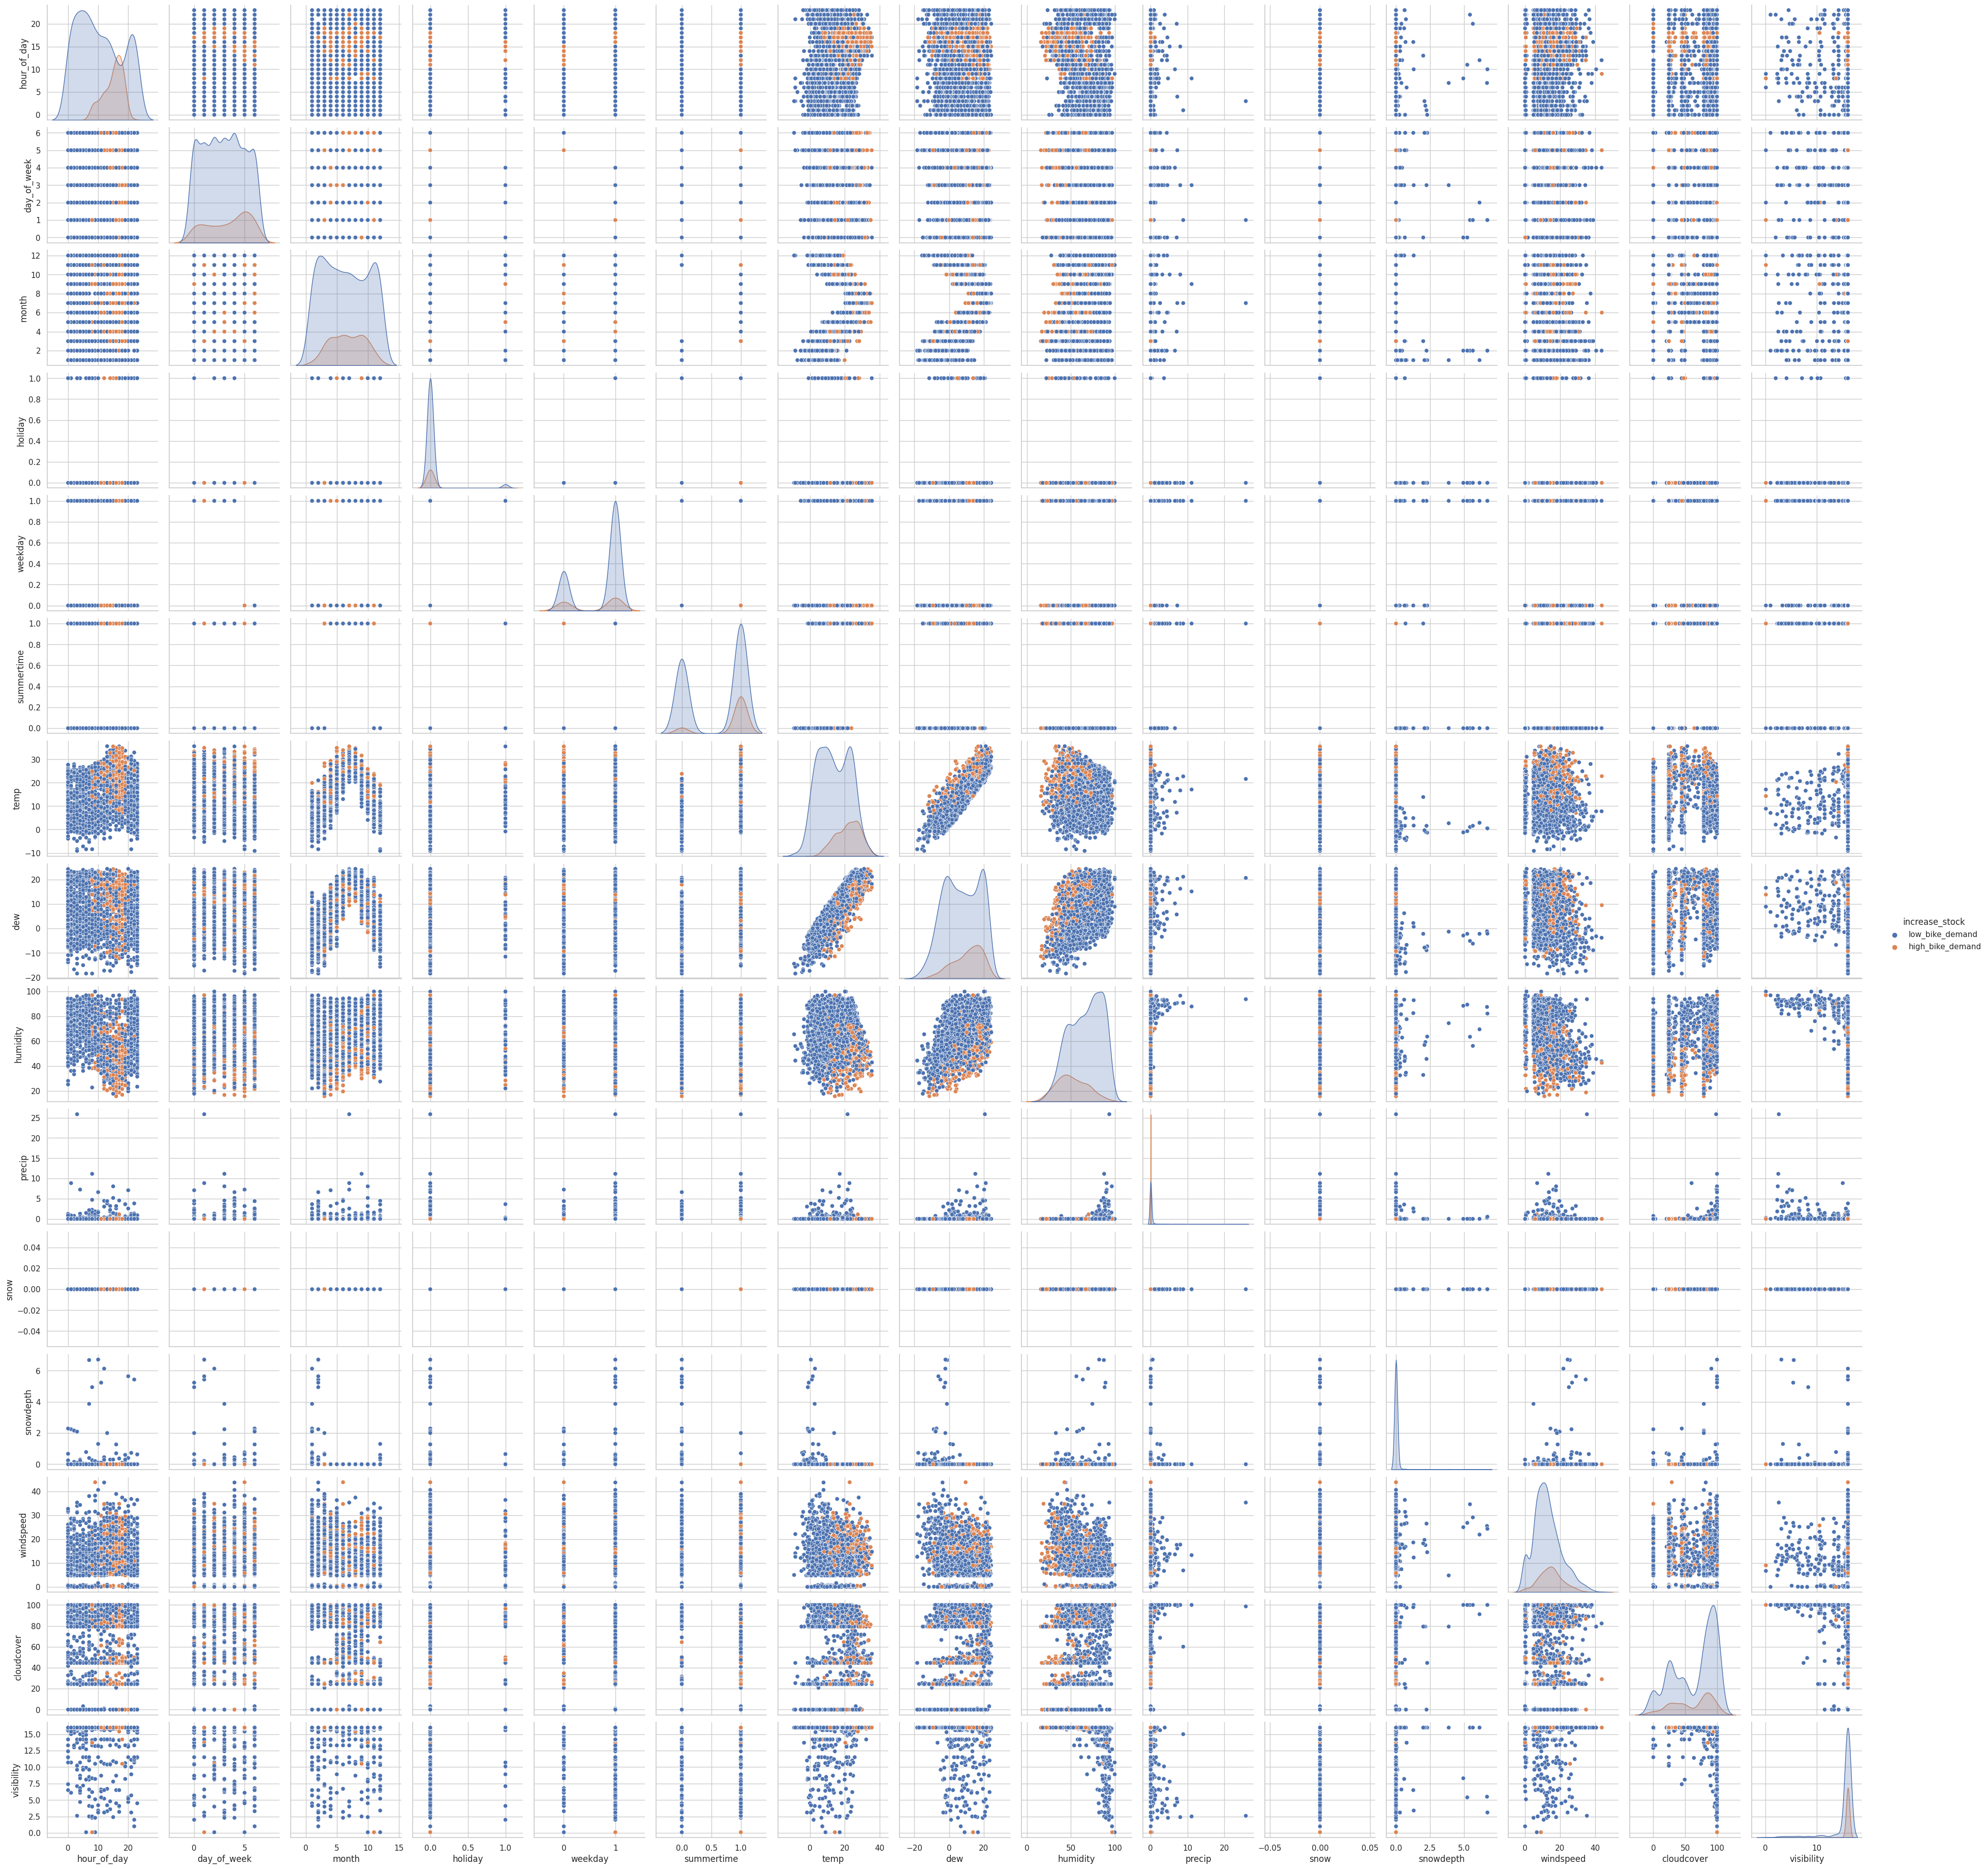

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.pairplot(df, hue='increase_stock')
plt.show()

<ipython-input-31-5f5a24c02296>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')


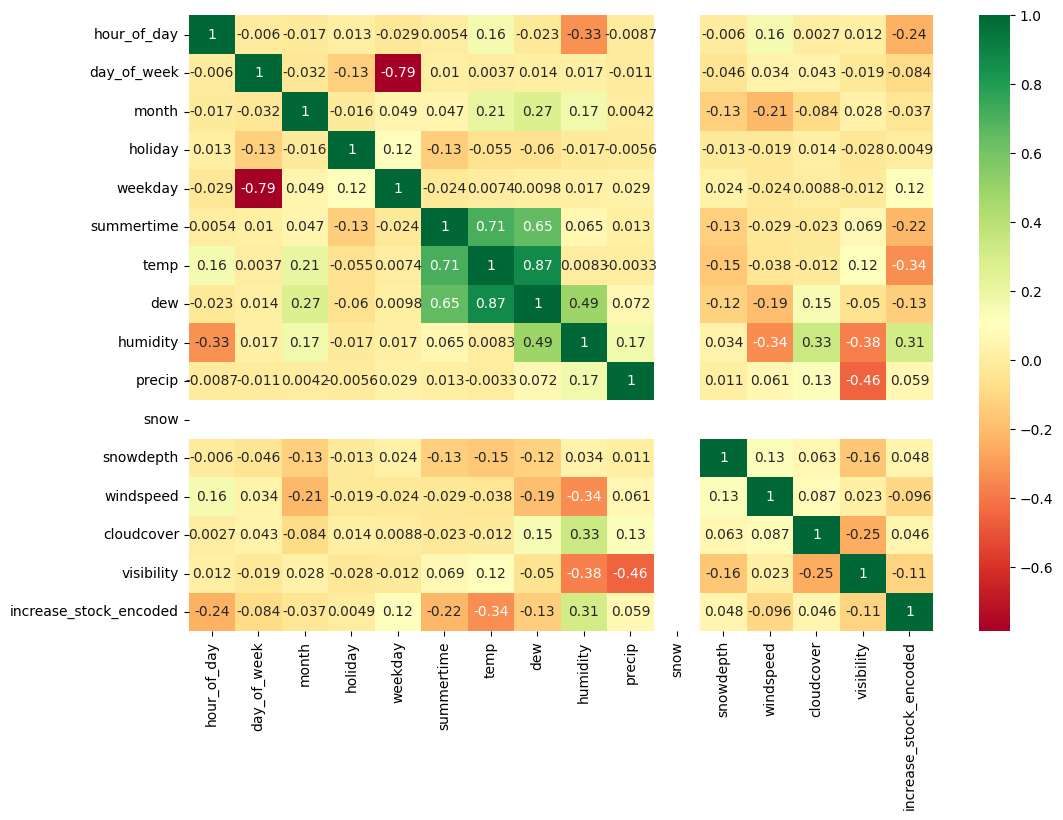

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame named 'df'

# Encode the categorical column 'increase_stock'
df['increase_stock_encoded'] = df['increase_stock'].astype('category').cat.codes

# Set the figure size
plt.figure(figsize=(12, 8))

# Generate a heatmap including the encoded categorical column
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

# Show the plot
plt.show()


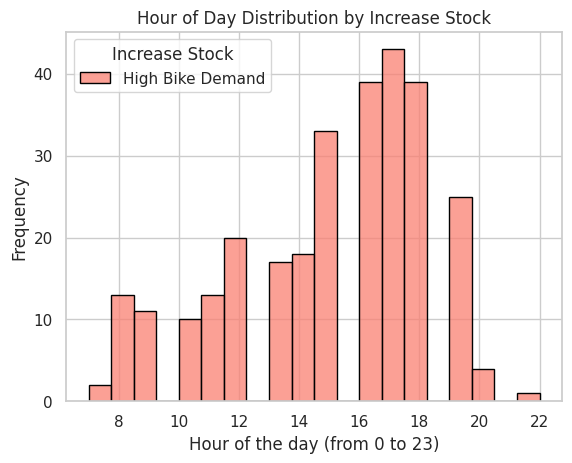

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
Hrs_of_day = df['hour_of_day']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'hour_of_day': Hrs_of_day, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
# sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='hour_of_day', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='hour_of_day', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Hour of the day (from 0 to 23)')
plt.ylabel('Frequency')
plt.title('Hour of Day Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


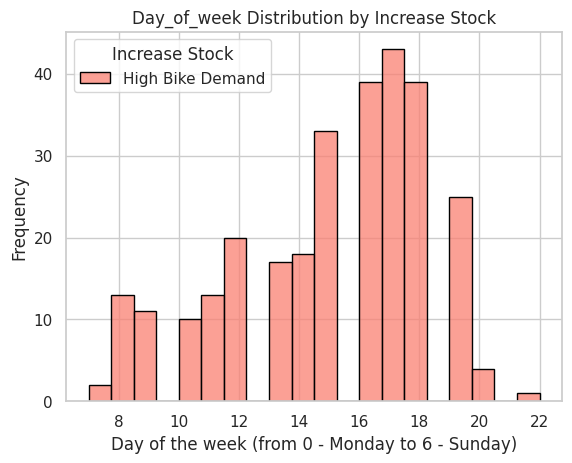

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
day_of_week = df['day_of_week']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'day_of_week': Hrs_of_day, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='day_of_week', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Day of the week (from 0 - Monday to 6 - Sunday)')
plt.ylabel('Frequency')
plt.title('Day_of_week Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


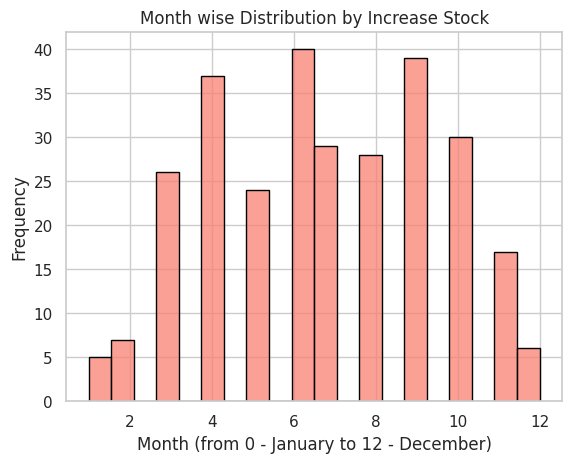

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
month = df['month']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'month': month, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='month', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Month (from 0 - January to 12 - December)')
plt.ylabel('Frequency')
plt.title('Month wise Distribution by Increase Stock')

# Display the legend
#plt.legend(title='Increase Stock')

# Display the plot
plt.show()


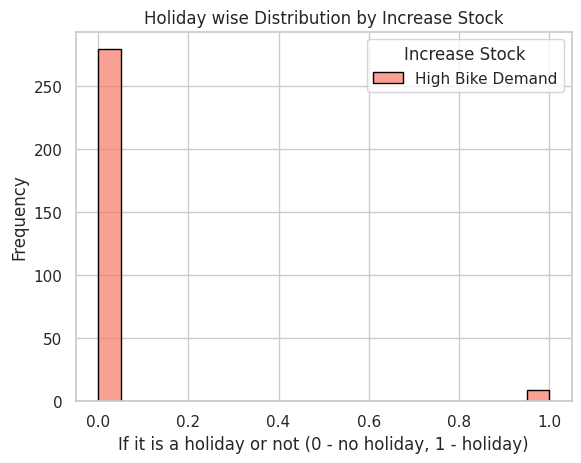

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
holiday = df['holiday']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'holiday': holiday, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
#sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='hour_of_day', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='holiday', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('If it is a holiday or not (0 - no holiday, 1 - holiday)')
plt.ylabel('Frequency')
plt.title('Holiday wise Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


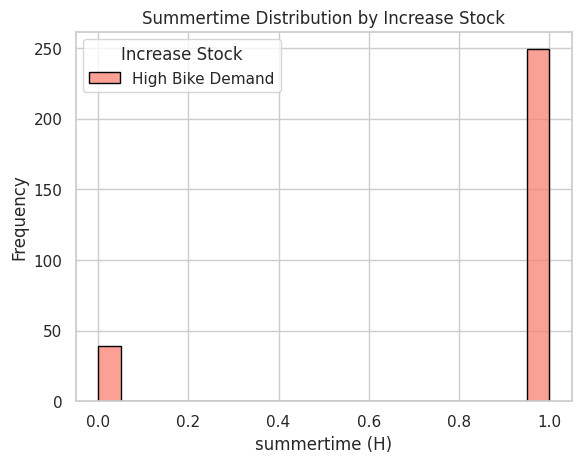

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
summertime = df['summertime']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'summertime': summertime, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='summertime', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('summertime (H)')
plt.ylabel('Frequency')
plt.title('Summertime Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


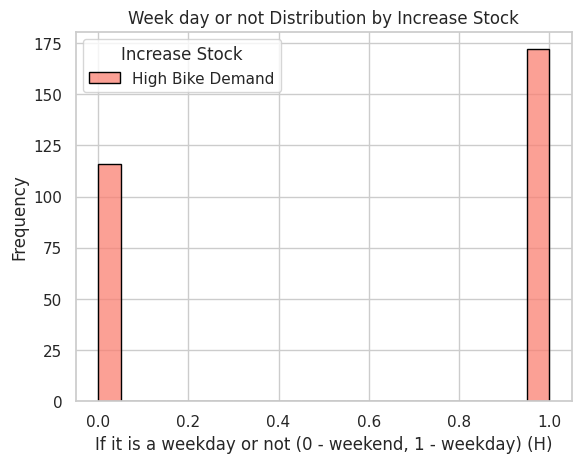

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
weekday = df['weekday']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'weekday': weekday, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='weekday', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('If it is a weekday or not (0 - weekend, 1 - weekday) (H)')
plt.ylabel('Frequency')
plt.title('Week day or not Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


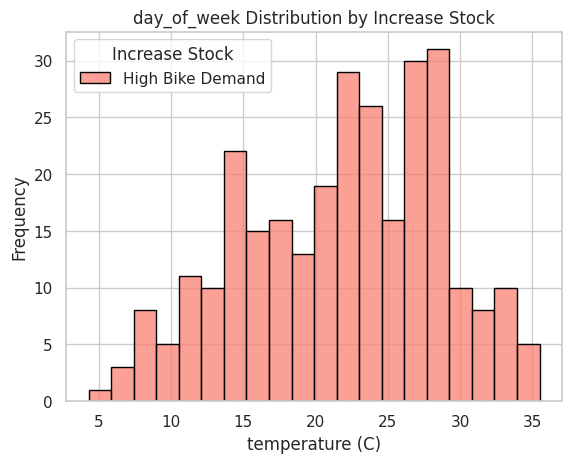

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
temp = df['temp']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'temp': temp, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
#sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='hour_of_day', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='temp', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Temperature in Celsius degrees.(C)')
plt.ylabel('Frequency')
plt.title('Temperature wise Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


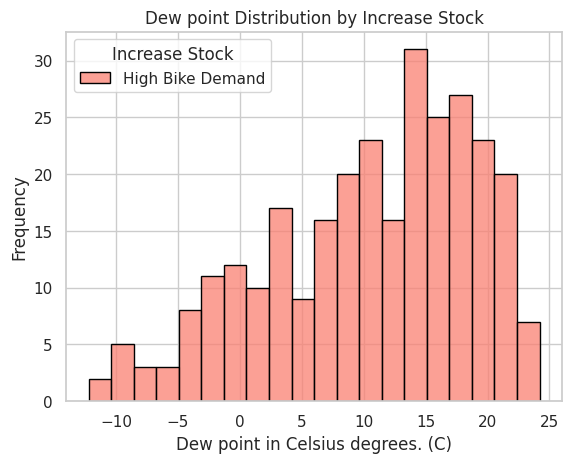

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
dew = df['dew']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'dew': dew, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
#sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='hour_of_day', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='dew', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Dew point in Celsius degrees. (C)')
plt.ylabel('Frequency')
plt.title('Dew point Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


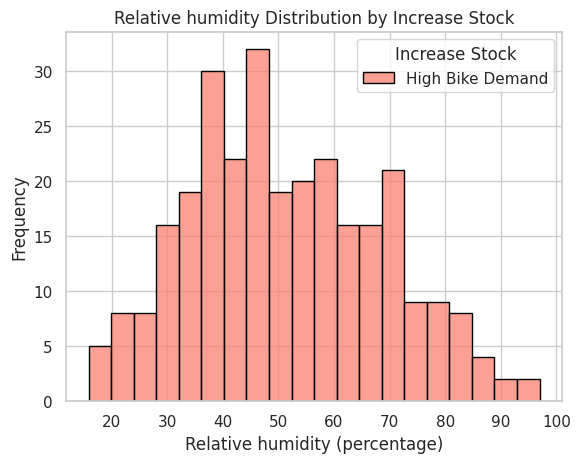

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
humidity = df['humidity']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'humidity': humidity, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph
#sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'low_bike_demand'], x='hour_of_day', bins=20, color='skyblue', edgecolor='black', label='Low Bike Demand')
sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='humidity', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Relative humidity (percentage)')
plt.ylabel('Frequency')
plt.title('Relative humidity Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


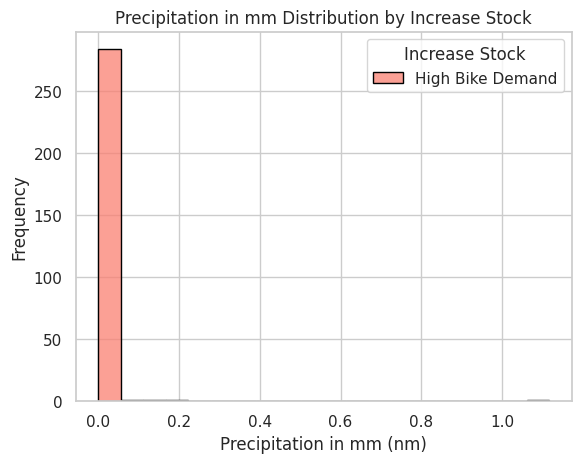

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
precip = df['precip']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'precip': precip, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='precip', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Precipitation in mm (nm)')
plt.ylabel('Frequency')
plt.title('Precipitation in mm Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


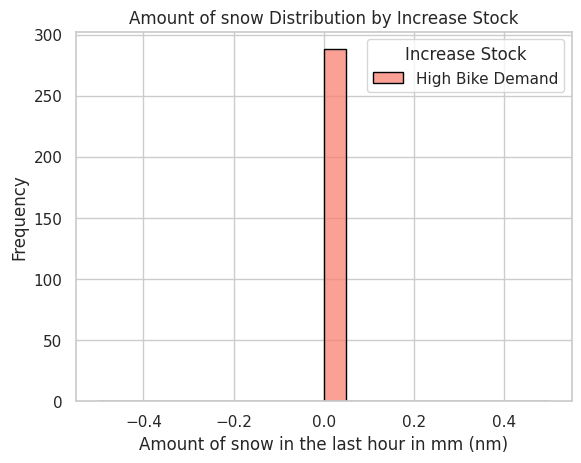

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
snow = df['snow']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'snow': snow, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='snow', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Amount of snow in the last hour in mm (nm)')
plt.ylabel('Frequency')
plt.title('Amount of snow Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


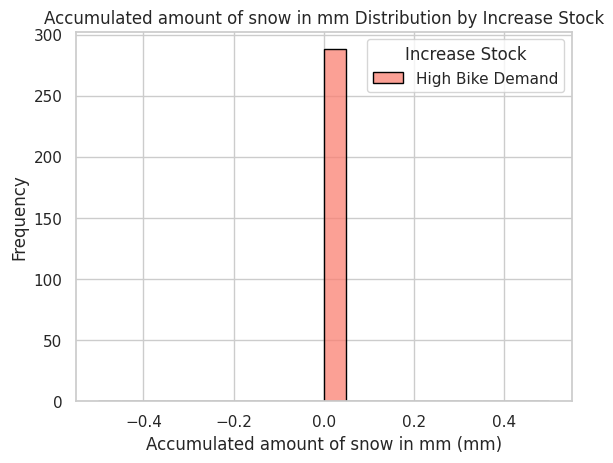

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
snowdepth = df['snowdepth']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'snowdepth': snowdepth, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='snowdepth', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Accumulated amount of snow in mm (mm)')
plt.ylabel('Frequency')
plt.title('Accumulated amount of snow in mm Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


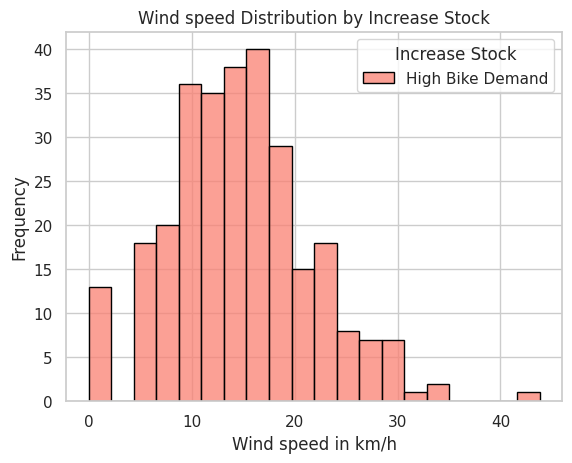

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
windspeed = df['windspeed']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'windspeed': windspeed, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='windspeed', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Wind speed in km/h')
plt.ylabel('Frequency')
plt.title('Wind speed Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


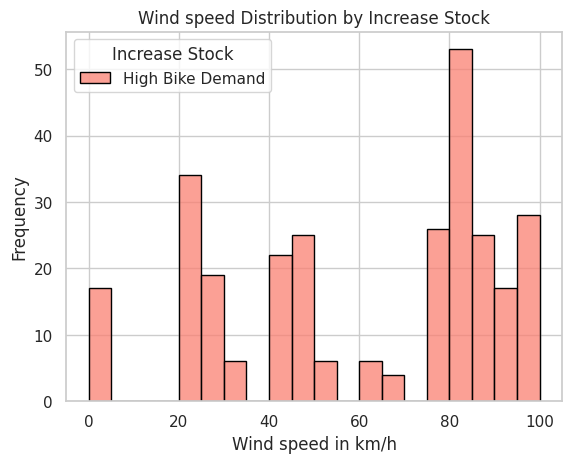

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
cloudcover = df['cloudcover']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'cloudcover': cloudcover, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='cloudcover', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Percentage of the city covered in clouds')
plt.ylabel('Frequency')
plt.title('Percentage of the city covered in clouds Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


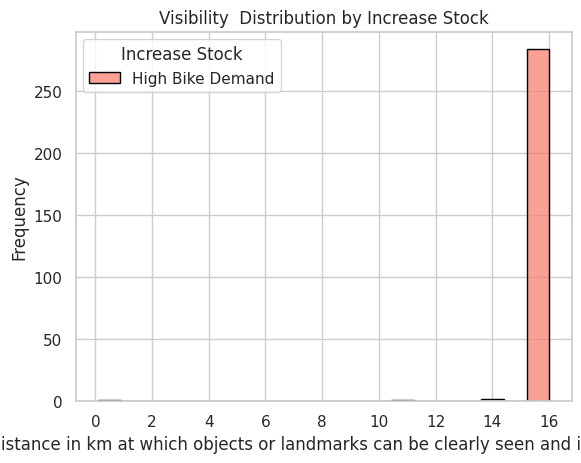

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame named 'df'
visibility = df['visibility']
increase_stock_categories = df['increase_stock']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'visibility': visibility, 'Increase Stock': increase_stock_categories})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for each category on the same graph

sns.histplot(data=plot_data[plot_data['Increase Stock'] == 'high_bike_demand'], x='visibility', bins=20, color='salmon', edgecolor='black', label='High Bike Demand')

# Adding labels and title
plt.xlabel('Distance in km at which objects or landmarks can be clearly seen and identified.')
plt.ylabel('Frequency')
plt.title('Visibility  Distribution by Increase Stock')

# Display the legend
plt.legend(title='Increase Stock')

# Display the plot
plt.show()


## Set the samples

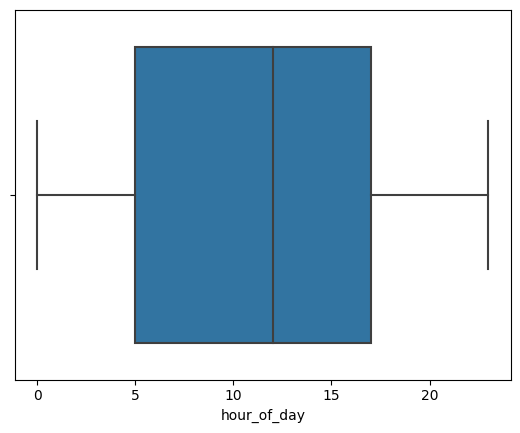

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x=df['hour_of_day'])
plt.show()

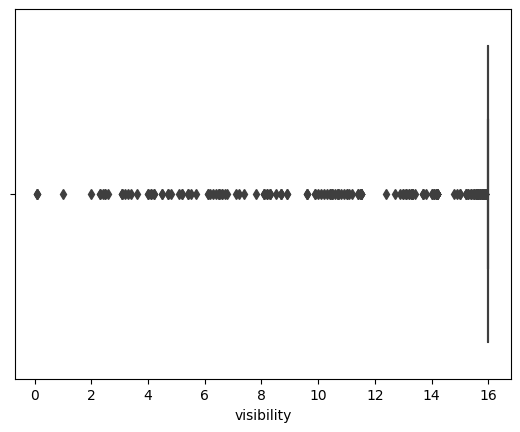

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x=df['visibility'])
plt.show()

## Preprocessing

### A. Identify outliers

#### 1. Understand the skewness of features

Feature: hours_of_day

<Axes: xlabel='hour_of_day'>

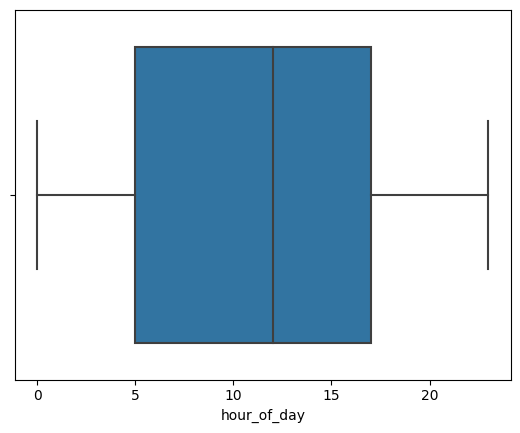

In [5]:
"""Box plot to identify outliers"""
import seaborn as sns
sns.boxplot(x=df["hour_of_day"])

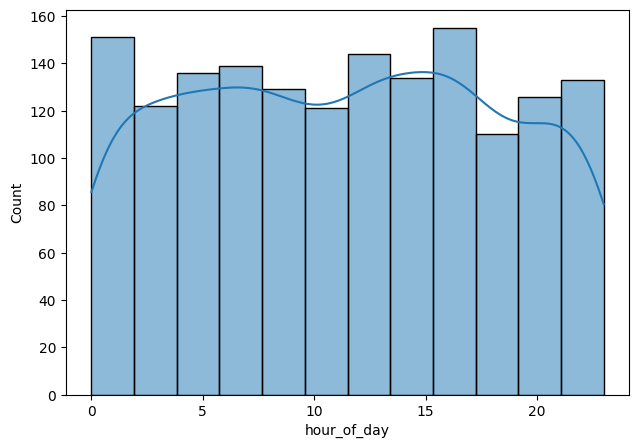

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['hour_of_day'], kde=True)
plt.show()

Note: `No outliers detected`

Feature: day_of_week

<Axes: xlabel='day_of_week'>

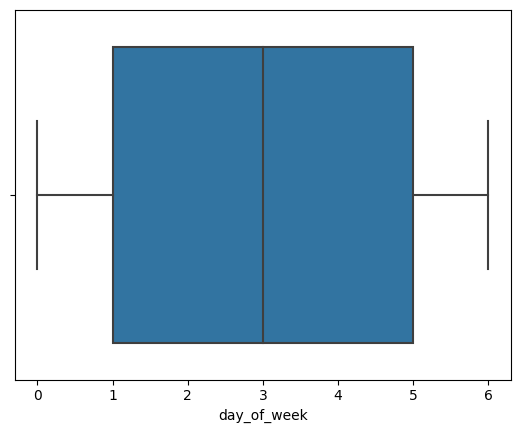

In [7]:
sns.boxplot(x=df["day_of_week"])

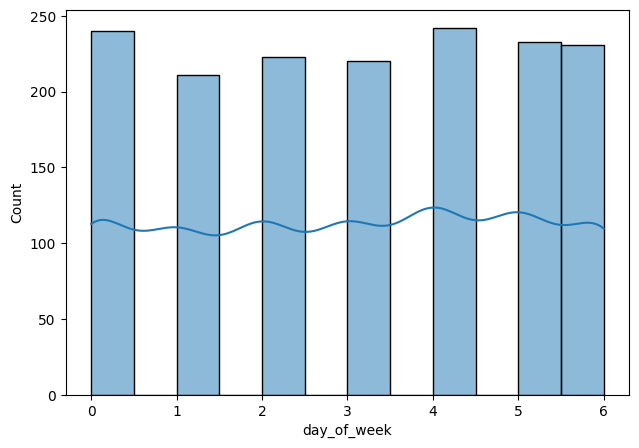

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['day_of_week'], kde=True)
plt.show()

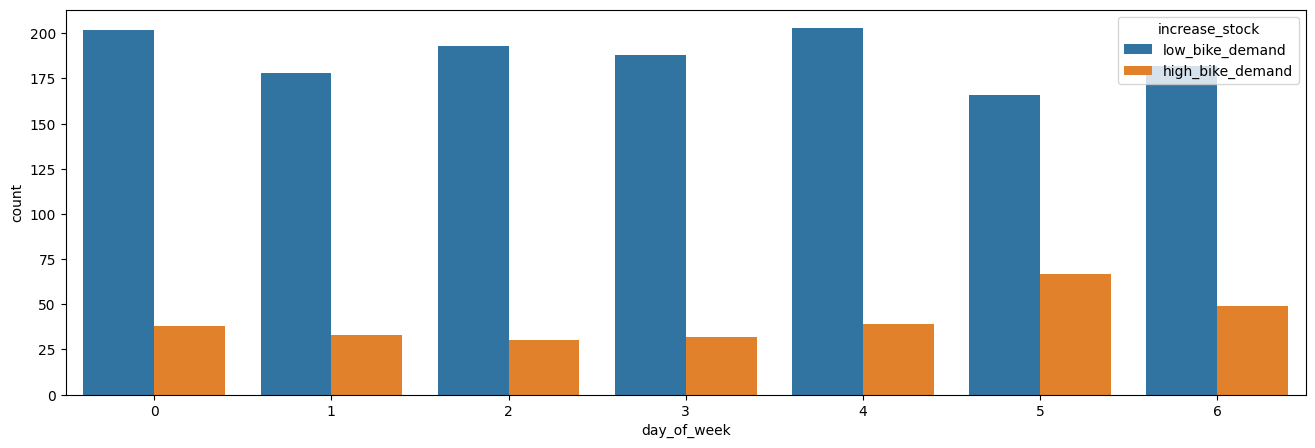

In [9]:
plt.figure(figsize=(16, 5))
sns.countplot(x='day_of_week', hue='increase_stock', data=df)

# Show the plot
plt.show()

Feature: month

<Axes: xlabel='month'>

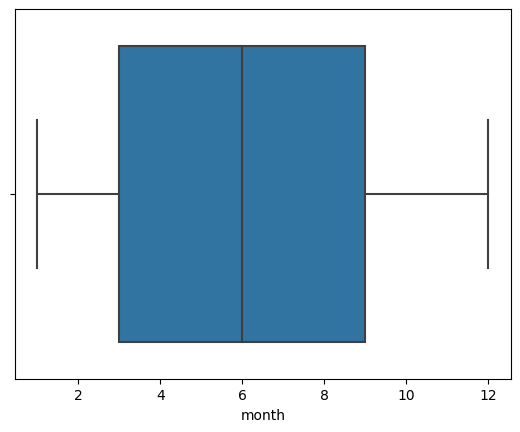

In [10]:
sns.boxplot(x=df["month"])

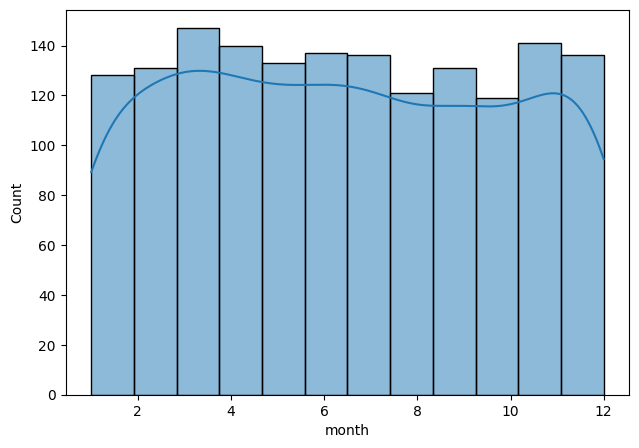

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['month'], kde=True)
plt.show()

Feature: holiday

<Axes: xlabel='holiday'>

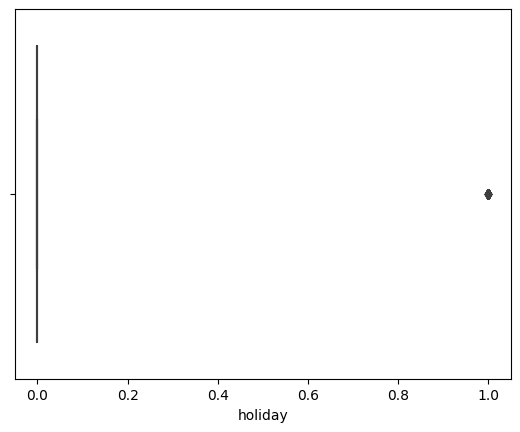

In [12]:
sns.boxplot(x=df["holiday"])

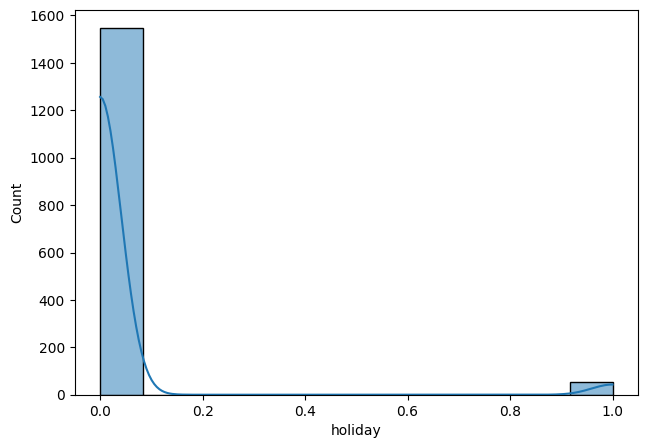

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['holiday'], kde=True)
plt.show()

Feature: weekday

<Axes: xlabel='weekday'>

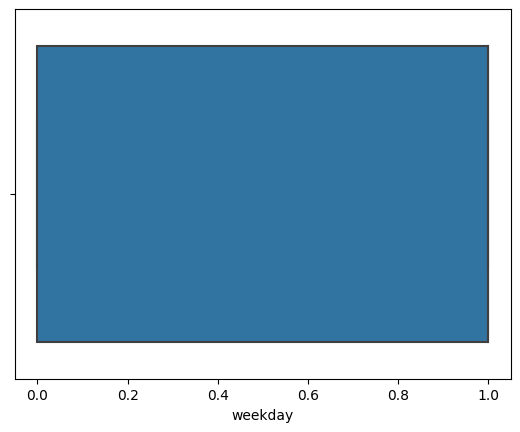

In [14]:
sns.boxplot(x=df["weekday"])

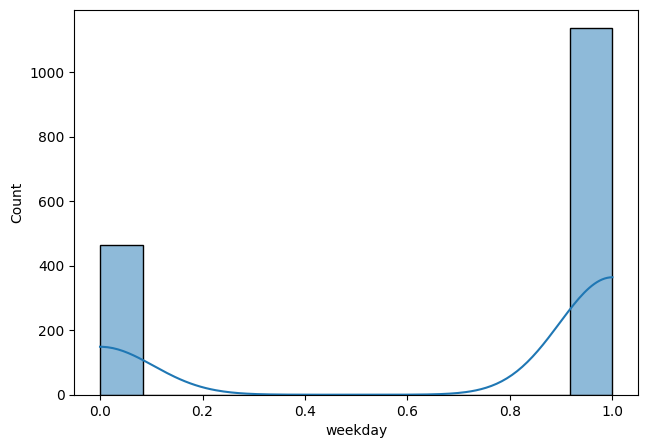

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['weekday'], kde=True)
plt.show()

Feature: summertime

<Axes: xlabel='summertime'>

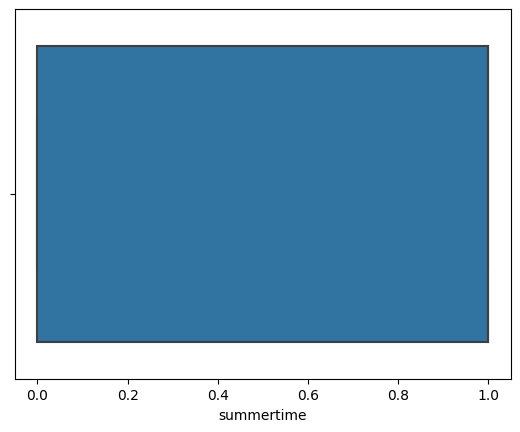

In [17]:
sns.boxplot(x=df["summertime"])

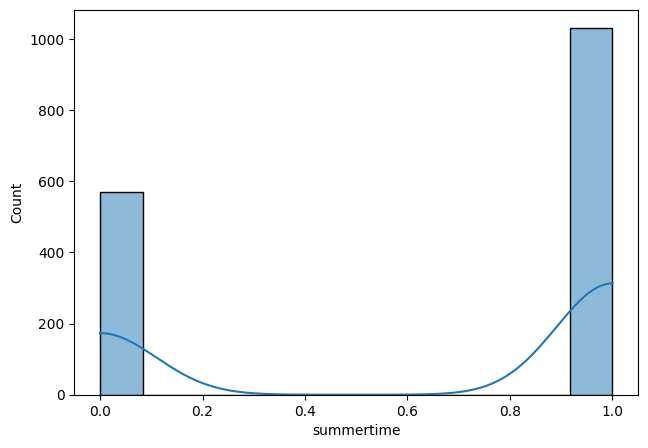

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['summertime'], kde=True)
plt.show()

Feature: temp

<Axes: xlabel='temp'>

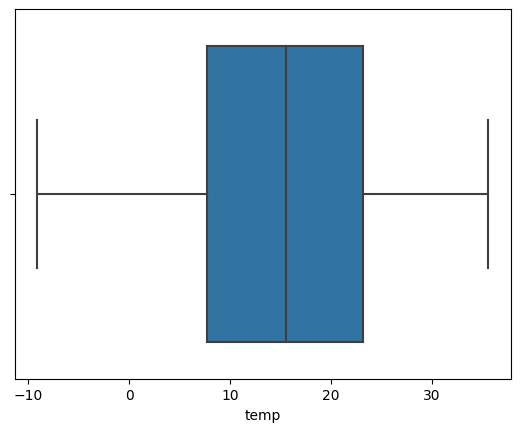

In [19]:
sns.boxplot(x=df["temp"])

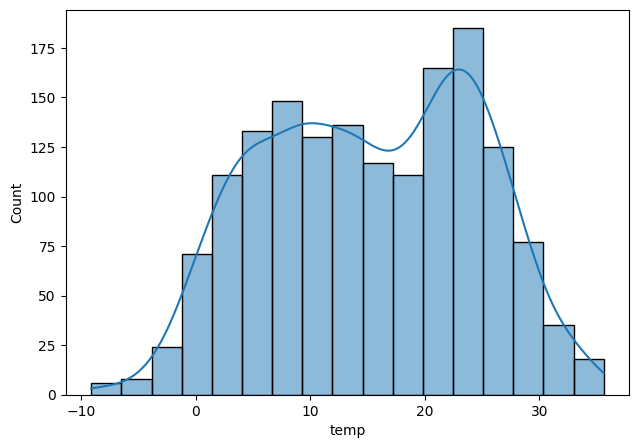

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['temp'], kde=True)
plt.show()

Feature: humidity

<Axes: xlabel='humidity'>

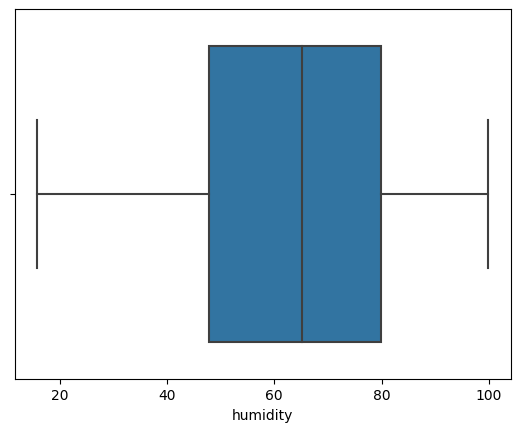

In [21]:
sns.boxplot(x=df["humidity"])

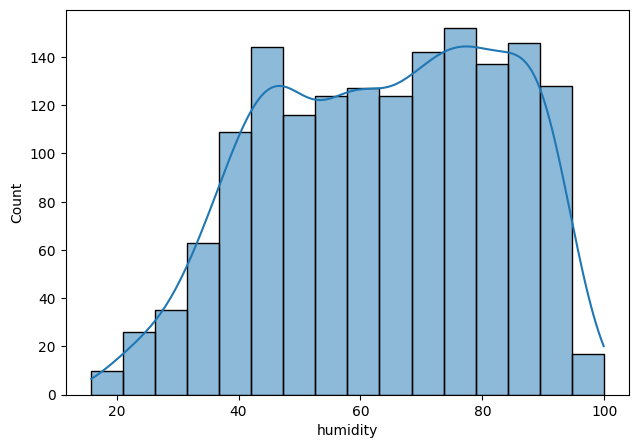

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['humidity'], kde=True)
plt.show()

Feature: precip

<Axes: xlabel='precip'>

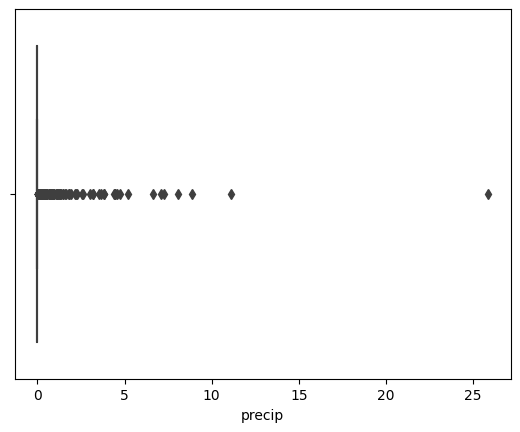

In [23]:
sns.boxplot(x=df["precip"])

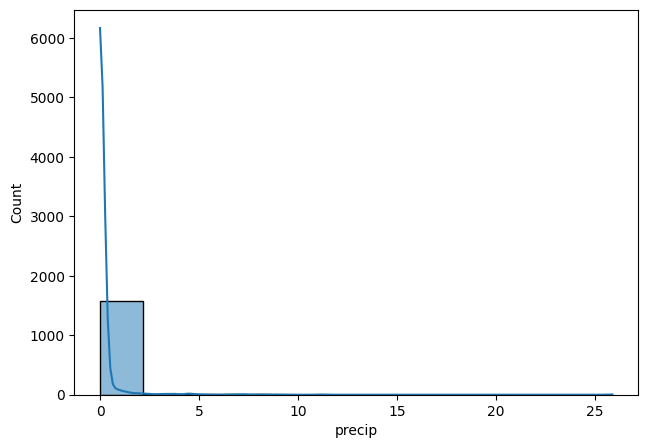

In [24]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['precip'], kde=True)
plt.show()

Note: Outliers identified

#### Treatment for outliers

In [25]:
print(df['precip'].median())
print('Max: ', df['precip'].max())
print('Min: ', df['precip'].min())
print('Mean: ', df['precip'].mean())

value_counts = df['precip'].value_counts()

# Display the result
print(value_counts)

Q1 = df['precip'].quantile(0.25)
Q3 = df['precip'].quantile(0.75)

print('Q1:', Q1)
print('Q3:', Q3)
IQR = Q3 - Q1

print('IQR:', IQR)

# # Identify outliers
outliers_mask = (df['precip'] < Q1 - 1.5 * IQR) | (df['precip'] > Q3 + 1.5 * IQR)

# # Handle outliers (replace with median, you can choose another method)
# df['precip'][outliers_mask] = df['precip'].median()
# df

0.0
Max:  25.871
Min:  0.0
Mean:  0.122041875
0.000    1445
0.022       9
0.018       5
0.011       5
0.278       4
         ... 
4.468       1
0.830       1
0.037       1
0.508       1
1.081       1
Name: precip, Length: 126, dtype: int64
Q1: 0.0
Q3: 0.0
IQR: 0.0


Max:  25.871
Min:  0.0
Mean:  0.122041875
fMax:  2.59
fMin:  0.0
fMean:  0.04334367088607595
      hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
1595            3            5      6        0        0           1  21.5   
1596           14            0      6        0        1           1  23.2   
1597           13            0      3        0        1           1  13.9   
1598           14            5      3        0        0           1  11.7   
1599           22            6      2        0        0     

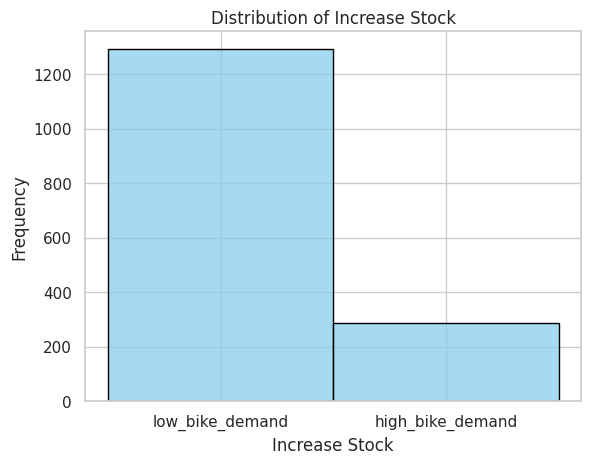

In [26]:
from scipy import stats
import numpy as np

print('Max: ', df['precip'].max())
print('Min: ', df['precip'].min())
print('Mean: ', df['precip'].mean())

feature_data = df['precip']

# Calculate Z-scores for the feature
z_scores = np.abs(stats.zscore(feature_data))

# Define a threshold for Z-scores (e.g., 3)
threshold = 3

# Identify outliers based on Z-scores
outliers = z_scores > threshold

# Remove outliers and create a new DataFrame
df_precip_no_outliers = df[~outliers]

print('fMax: ', df_precip_no_outliers['precip'].max())
print('fMin: ', df_precip_no_outliers['precip'].min())
print('fMean: ', df_precip_no_outliers['precip'].mean())

# Print the DataFrame with outliers marked
print(df_precip_no_outliers)
print(df_precip_no_outliers[df_precip_no_outliers['increase_stock'] == 'high_bike_demand'].shape[0])
# Assuming your data is stored in a pandas DataFrame named 'df'
increase_stock_categories = df_precip_no_outliers['increase_stock']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for the "increase_stock" column
sns.histplot(data=df_precip_no_outliers, x='increase_stock', color='skyblue', edgecolor='black', discrete=True)

# Adding labels and title
plt.xlabel('Increase Stock')
plt.ylabel('Frequency')
plt.title('Distribution of Increase Stock')

# Display the plot
plt.show()

Feature: snowdepth

<Axes: xlabel='snowdepth'>

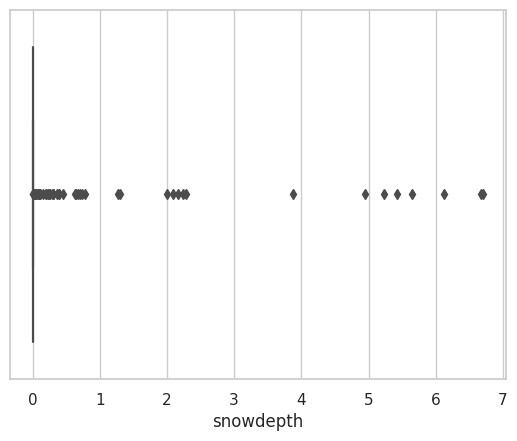

In [27]:
sns.boxplot(x=df_precip_no_outliers["snowdepth"])

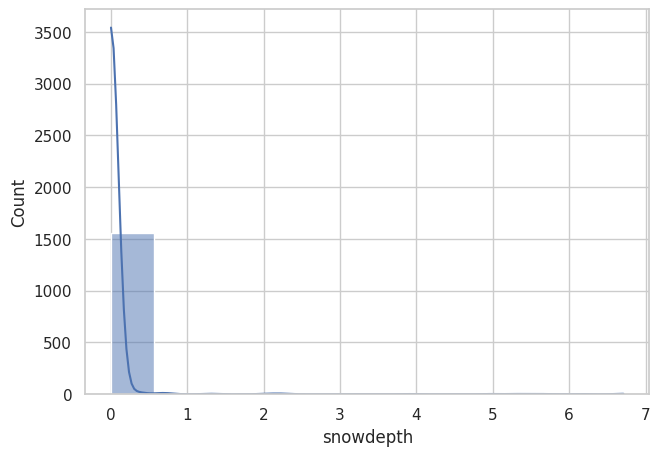

In [28]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df_precip_no_outliers['snowdepth'], kde=True)
plt.show()

IQR

In [29]:
print(df_precip_no_outliers['snowdepth'].median())
print('Max: ', df_precip_no_outliers['snowdepth'].max())
print('Min: ', df_precip_no_outliers['snowdepth'].min())
print('Mean: ', df_precip_no_outliers['snowdepth'].mean())

value_counts = df_precip_no_outliers['snowdepth'].value_counts()

# Display the result
print(value_counts)

Q1 = df_precip_no_outliers['snowdepth'].quantile(0.25)
Q3 = df_precip_no_outliers['snowdepth'].quantile(0.75)

print('Q1:', Q1)
print('Q3:', Q3)
IQR = Q3 - Q1

print('IQR:', IQR)

# # Identify outliers
outliers_mask = (df_precip_no_outliers['snowdepth'] < Q1 - 1.5 * IQR) | (df_precip_no_outliers['snowdepth'] > Q3 + 1.5 * IQR)

0.0
Max:  6.71
Min:  0.0
Mean:  0.04268987341772151
0.00    1524
0.03       5
0.10       5
0.30       4
0.05       3
0.11       2
0.01       2
0.20       2
0.02       2
0.40       2
0.70       1
5.23       1
6.13       1
2.24       1
2.29       1
4.94       1
0.15       1
6.71       1
1.27       1
2.16       1
0.25       1
2.09       1
0.63       1
0.45       1
1.30       1
0.04       1
0.67       1
5.64       1
0.37       1
0.26       1
0.73       1
5.43       1
0.65       1
6.68       1
0.23       1
3.87       1
0.08       1
0.78       1
2.00       1
Name: snowdepth, dtype: int64
Q1: 0.0
Q3: 0.0
IQR: 0.0


Z-Score

Max:  6.71
Min:  0.0
Mean:  0.04268987341772151
fMax:  2.59
fMin:  0.0
fMean:  0.043162093171665604
      hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
1594           22            6      9        0        0           1  23.2   
1595            3            5      6        0        0           1  21.5   
1596           14            0      6        0        1           1  23.2   
1598           14            5      3        0        0           1  11.7   
1599           22            6      2        0       

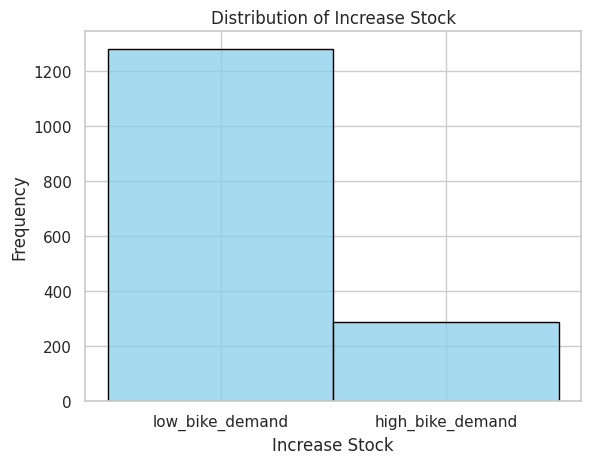

In [30]:
from scipy import stats
import numpy as np

print('Max: ', df_precip_no_outliers['snowdepth'].max())
print('Min: ', df_precip_no_outliers['snowdepth'].min())
print('Mean: ', df_precip_no_outliers['snowdepth'].mean())

feature_data = df_precip_no_outliers['snowdepth']

# Calculate Z-scores for the feature
z_scores = np.abs(stats.zscore(feature_data))

# Define a threshold for Z-scores (e.g., 3)
threshold = 3

# Identify outliers based on Z-scores
outliers = z_scores > threshold

# Remove outliers and create a new DataFrame
df_snowdepth_no_outliers = df_precip_no_outliers[~outliers]

print('fMax: ', df_snowdepth_no_outliers['precip'].max())
print('fMin: ', df_snowdepth_no_outliers['precip'].min())
print('fMean: ', df_snowdepth_no_outliers['precip'].mean())

# Print the DataFrame with outliers marked
print(df_snowdepth_no_outliers)
print(df_snowdepth_no_outliers[df_snowdepth_no_outliers['increase_stock'] == 'high_bike_demand'].shape[0])
# Assuming your data is stored in a pandas DataFrame named 'df'
increase_stock_categories = df_snowdepth_no_outliers['increase_stock']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for the "increase_stock" column
sns.histplot(data=df_snowdepth_no_outliers, x='increase_stock', color='skyblue', edgecolor='black', discrete=True)

# Adding labels and title
plt.xlabel('Increase Stock')
plt.ylabel('Frequency')
plt.title('Distribution of Increase Stock')

# Display the plot
plt.show()

Feature: windspeed

<Axes: xlabel='windspeed'>

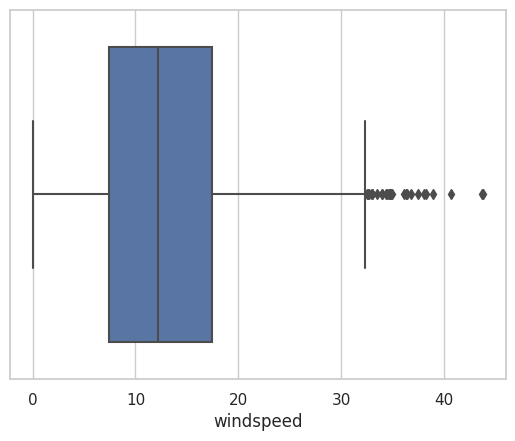

In [31]:
sns.boxplot(x=df_snowdepth_no_outliers["windspeed"])

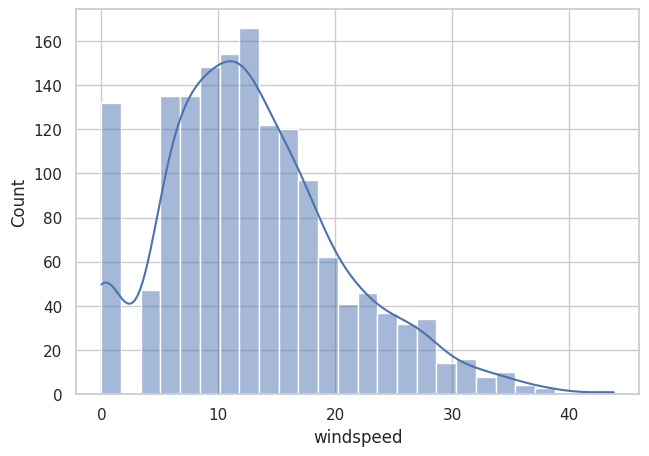

In [32]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df_snowdepth_no_outliers['windspeed'], kde=True)
plt.show()

IQR

In [38]:
print(df_snowdepth_no_outliers['windspeed'].median())
print('Max: ', df_snowdepth_no_outliers['windspeed'].max())
print('Min: ', df_snowdepth_no_outliers['windspeed'].min())
print('Mean: ', df_snowdepth_no_outliers['windspeed'].mean())

value_counts = df_snowdepth_no_outliers['windspeed'].value_counts()

# Display the result
print(value_counts)

Q1 = df_snowdepth_no_outliers['windspeed'].quantile(0.25)
Q3 = df_snowdepth_no_outliers['windspeed'].quantile(0.75)

print('Q1:', Q1)
print('Q3:', Q3)
IQR = Q3 - Q1

print('IQR:', IQR)

# # Identify outliers
outliers_mask = (df_snowdepth_no_outliers['windspeed'] < Q1 - 1.5 * IQR) | (df_snowdepth_no_outliers['windspeed'] > Q3 + 1.5 * IQR)

df_windspeed_no_outliers = df_snowdepth_no_outliers[~outliers_mask]
# Print the DataFrame with outliers marked
df_windspeed_no_outliers
print(df_windspeed_no_outliers)
print(df_windspeed_no_outliers[df_windspeed_no_outliers['increase_stock'] == 'high_bike_demand'].shape[0])

12.2
Max:  43.8
Min:  0.0
Mean:  12.97141033822591
0.0     66
4.8     38
6.7     38
7.1     27
5.2     26
        ..
10.4     1
25.6     1
27.6     1
29.0     1
34.3     1
Name: windspeed, Length: 278, dtype: int64
Q1: 7.4
Q3: 17.4
IQR: 9.999999999999998
      hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
1594           22            6      9        0        0           1  23.2   
1595            3            5      6        0        0           1  21.5   
1596           14            0      6        0      

Z-score

Max:  43.8
Min:  0.0
Mean:  12.97141033822591
0       0.431073
1       1.415319
2       1.679877
3       0.806640
4       0.320063
          ...   
1594    0.501371
1595    0.307112
1596    0.410717
1598    0.928741
1599    1.156307
Name: windspeed, Length: 1567, dtype: float64
fMax:  28.4
fMin:  0.0
fMean:  12.125832223701732
      hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
1594           22            6      9        0        0           1  23.2   
1595            3            5      6        0        0

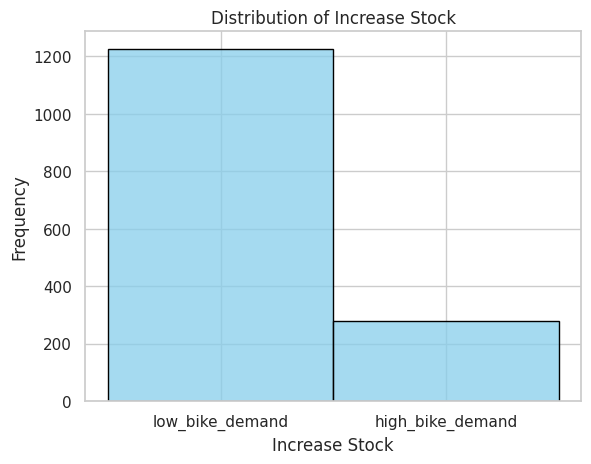

In [43]:
from scipy import stats
import numpy as np

print('Max: ', df_snowdepth_no_outliers['windspeed'].max())
print('Min: ', df_snowdepth_no_outliers['windspeed'].min())
print('Mean: ', df_snowdepth_no_outliers['windspeed'].mean())

feature_data = df_snowdepth_no_outliers['windspeed']

# Calculate Z-scores for the feature
z_scores = np.abs(stats.zscore(feature_data))
print(z_scores)

# Define a threshold for Z-scores (e.g., 3)
threshold = 2

# Identify outliers based on Z-scores
outliers = z_scores > threshold

# Remove outliers and create a new DataFrame
df_windspeed_no_outliers = df_snowdepth_no_outliers[~outliers]

print('fMax: ', df_windspeed_no_outliers['windspeed'].max())
print('fMin: ', df_windspeed_no_outliers['windspeed'].min())
print('fMean: ', df_windspeed_no_outliers['windspeed'].mean())

# Print the DataFrame with outliers marked
print(df_windspeed_no_outliers)
print(df_windspeed_no_outliers[df_windspeed_no_outliers['increase_stock'] == 'high_bike_demand'].shape[0])
# Assuming your data is stored in a pandas DataFrame named 'df'
increase_stock_categories = df_windspeed_no_outliers['increase_stock']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for the "increase_stock" column
sns.histplot(data=df_windspeed_no_outliers, x='increase_stock', color='skyblue', edgecolor='black', discrete=True)

# Adding labels and title
plt.xlabel('Increase Stock')
plt.ylabel('Frequency')
plt.title('Distribution of Increase Stock')

# Display the plot
plt.show()

Feature: cloudcover

<Axes: xlabel='cloudcover'>

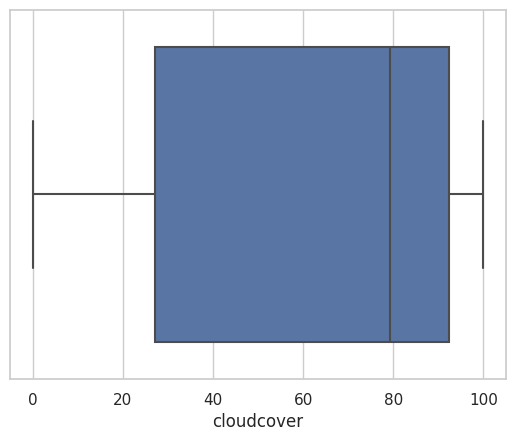

In [46]:
sns.boxplot(x=df_windspeed_no_outliers["cloudcover"])

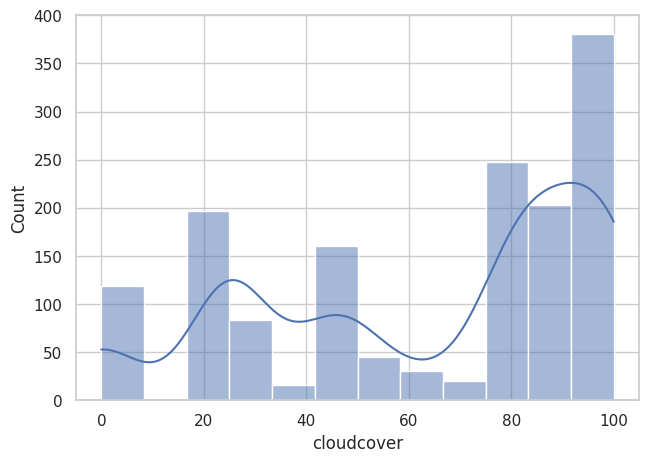

In [47]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df_windspeed_no_outliers['cloudcover'], kde=True)
plt.show()

In [48]:
print('Max: ', df_windspeed_no_outliers['cloudcover'].max())
print('Min: ', df_windspeed_no_outliers['cloudcover'].min())
print('Mean: ', df_windspeed_no_outliers['cloudcover'].mean())

Max:  100.0
Min:  0.0
Mean:  63.77942743009321


Feature: visibility

<Axes: xlabel='visibility'>

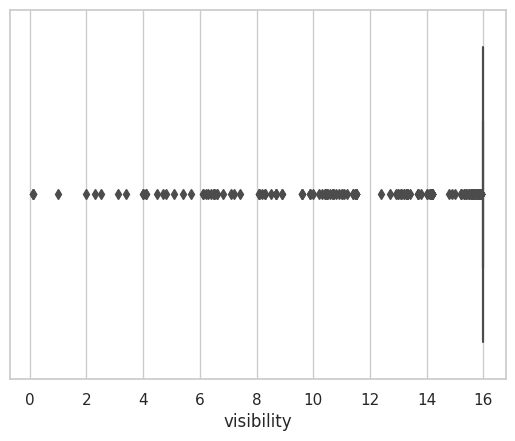

In [49]:
sns.boxplot(x=df_windspeed_no_outliers["visibility"])

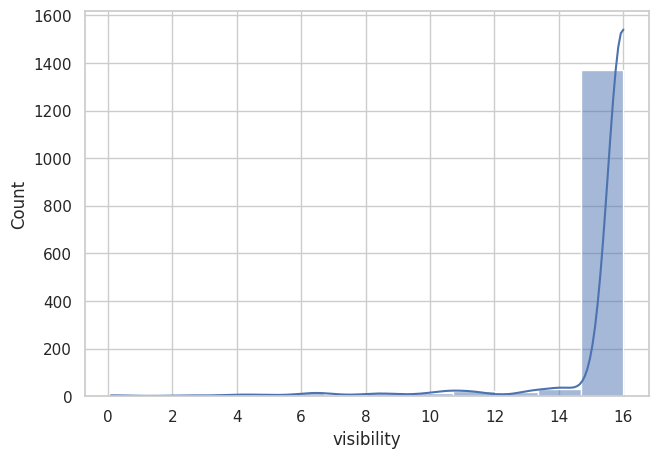

In [50]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df_windspeed_no_outliers['visibility'], kde=True)
plt.show()

IQR

In [51]:
print(df_windspeed_no_outliers['visibility'].median())
print('Max: ', df_windspeed_no_outliers['visibility'].max())
print('Min: ', df_windspeed_no_outliers['visibility'].min())
print('Mean: ', df_windspeed_no_outliers['visibility'].mean())

value_counts = df_windspeed_no_outliers['visibility'].value_counts()

# Display the result
print(value_counts)

Q1 = df_windspeed_no_outliers['visibility'].quantile(0.25)
Q3 = df_windspeed_no_outliers['visibility'].quantile(0.75)

print('Q1:', Q1)
print('Q3:', Q3)
IQR = Q3 - Q1

print('IQR:', IQR)

# # Identify outliers
outliers_mask = (df_windspeed_no_outliers['visibility'] < Q1 - 1.5 * IQR) | (df_windspeed_no_outliers['visibility'] > Q3 + 1.5 * IQR)

df_visibility_no_outliers = df_windspeed_no_outliers[~outliers_mask]
# Print the DataFrame with outliers marked
df_visibility_no_outliers
print(df_visibility_no_outliers)
print(df_visibility_no_outliers[df_visibility_no_outliers['increase_stock'] == 'high_bike_demand'].shape[0])

16.0
Max:  16.0
Min:  0.1
Mean:  15.46750998668442
16.0    1277
15.9      40
14.2      20
15.8      18
15.6      13
        ... 
5.4        1
3.4        1
12.9       1
6.3        1
7.1        1
Name: visibility, Length: 72, dtype: int64
Q1: 16.0
Q3: 16.0
IQR: 0.0
      hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
1593           13            2     11        0        1           0  12.2   
1594           22            6      9        0        0           1  23.2   
1595            3            5      6      

Z-score

Max:  16.0
Min:  0.1
Mean:  15.46750998668442
0       0.265557
1       0.265557
2       0.265557
3       0.265557
4       0.265557
          ...   
1594    0.265557
1595    0.265557
1596    2.527211
1598    0.265557
1599    0.265557
Name: visibility, Length: 1502, dtype: float64
fMax:  28.4
fMin:  0.0
fMean:  12.16498599439776
      hour_of_day  day_of_week  month  holiday  weekday  summertime  temp  \
0               5            5      1        0        0           0  -7.2   
1              21            4      1        0        1           0  -1.3   
2              21            3      8        0        1           1  26.9   
3               1            6      1        0        0           0   3.1   
4              17            0      3        0        1           0  11.7   
...           ...          ...    ...      ...      ...         ...   ...   
1593           13            2     11        0        1           0  12.2   
1594           22            6      9        0        0

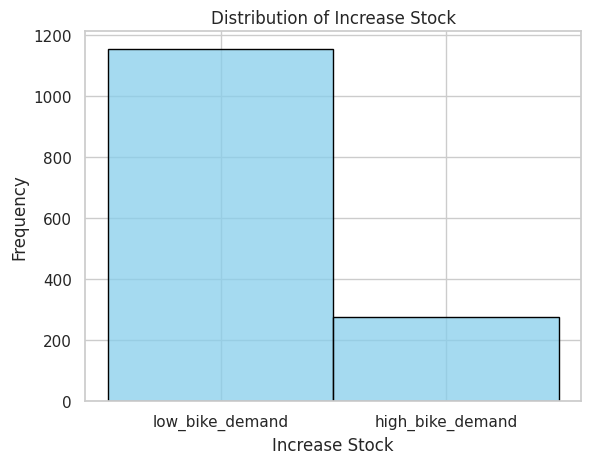

In [54]:
from scipy import stats
import numpy as np

print('Max: ', df_windspeed_no_outliers['visibility'].max())
print('Min: ', df_windspeed_no_outliers['visibility'].min())
print('Mean: ', df_windspeed_no_outliers['visibility'].mean())

feature_data = df_windspeed_no_outliers['visibility']

# Calculate Z-scores for the feature
z_scores = np.abs(stats.zscore(feature_data))
print(z_scores)

# Define a threshold for Z-scores (e.g., 3)
threshold = 2

# Identify outliers based on Z-scores
outliers = z_scores > threshold

# Remove outliers and create a new DataFrame
df_visibility_no_outliers = df_windspeed_no_outliers[~outliers]

print('fMax: ', df_visibility_no_outliers['windspeed'].max())
print('fMin: ', df_visibility_no_outliers['windspeed'].min())
print('fMean: ', df_visibility_no_outliers['windspeed'].mean())

# Print the DataFrame with outliers marked
print(df_visibility_no_outliers)
print(df_visibility_no_outliers[df_visibility_no_outliers['increase_stock'] == 'high_bike_demand'].shape[0])
# Assuming your data is stored in a pandas DataFrame named 'df'
increase_stock_categories = df_visibility_no_outliers['increase_stock']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram for the "increase_stock" column
sns.histplot(data=df_visibility_no_outliers, x='increase_stock', color='skyblue', edgecolor='black', discrete=True)

# Adding labels and title
plt.xlabel('Increase Stock')
plt.ylabel('Frequency')
plt.title('Distribution of Increase Stock')

# Display the plot
plt.show()

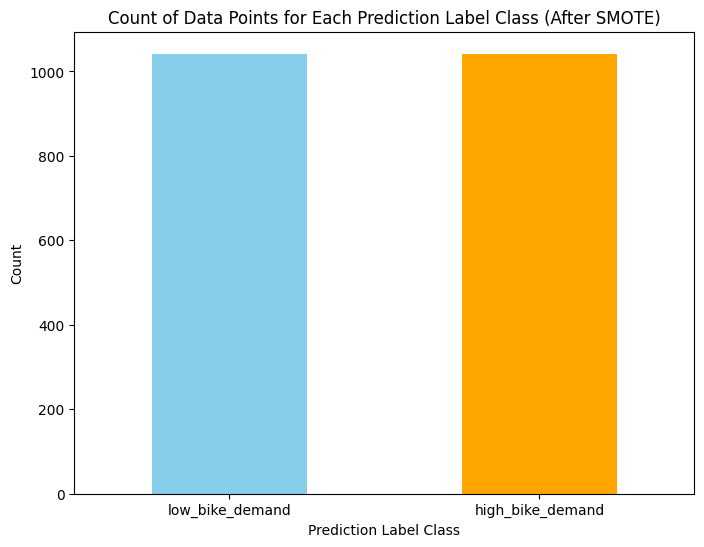

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'df' containing your data
# Replace 'your_dataset.csv' with the actual dataset file or use your data loading method

# Example:
# df = pd.read_csv('your_dataset.csv')

# Separate features (X) and target variable (y)
X = df.drop('increase_stock', axis=1)  # Assuming 'prediction_label' is your categorical target variable
y = df['increase_stock']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='increase_stock')], axis=1)

# Plotting the count of data points for each class in a bar chart after SMOTE
prediction_label_counts_resampled = df_resampled['increase_stock'].value_counts()

plt.figure(figsize=(8, 6))
prediction_label_counts_resampled.plot(kind='bar', color=['skyblue', 'orange'])  # Specify colors for each class
plt.title('Count of Data Points for Each Prediction Label Class (After SMOTE)')
plt.xlabel('Prediction Label Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # No rotation for two classes
plt.show()

In [ ]:
X_resampled

hour_of_day  day_of_week  month  holiday  weekday  summertime  \
0              18            0      1        0        1           0   
1              20            4      3        0        1           0   
2               2            0     12        0        1           0   
3              23            6      9        0        0           1   
4               0            3     12        0        1           0   
...           ...          ...    ...      ...      ...         ...   
2079           11            5      7        0        0           1   
2080           12            6      5        0        0           1   
2081           15            3      4        0        0           1   
2082           17            4     10        0        0           0   
2083           12            4      4        0        0           1   

           temp        dew   humidity  precip  snow  snowdepth  windspeed  \
0      5.000000  -0.800000  66.350000     0.0     0        0.0   6.700000   
1     19.200000  -0.600000  26.400000     0.0     0        0.0  10.400000   
2      4.300000   1.700000  83.170000     0.0     0        0.0  14.500000   
3     17.300000   9.400000  59.760000     0.0     0        0.0   7.400000   
4      4.800000  -7.800000  39.640000     0.0     0        0.0  12.500000   
...         ...        ...        ...     ...   ...        ...        ...   
2079  26.886210  20.748666  69.066069     0.0     0        0.0  12.463966   
2080  22.690210  11.831731  50.487036     0.0     0        0.0   7.293007   
2081  29.263638  16.395457  45.809548     0.0     0        0.0  13.045454   
2082  15.331856  -1.938969  30.398391     0.0     0        0.0   9.656186   
2083  20.351725   6.613794  40.871380     0.0     0        0.0  12.962069   

      cloudcover  visibility  
0      93.800000        16.0  
1      44.600000        16.0  
2      29.700000        16.0  
3       0.000000        16.0  
4       0.000000        16.0  
...          ...         ...  
2079   79.300000        16.0  
2080   56.347727        16.0  
2081   83.536369        16.0  
2082   46.478145        16.0  
2083   82.872415        16.0  

[2084 rows x 15 columns]

In [ ]:
y_resampled

0        low_bike_demand
1        low_bike_demand
2        low_bike_demand
3        low_bike_demand
4        low_bike_demand
              ...       
2079    high_bike_demand
2080    high_bike_demand
2081    high_bike_demand
2082    high_bike_demand
2083    high_bike_demand
Name: increase_stock, Length: 2084, dtype: object

      hour_of_day  day_of_week  month  holiday  weekday  summertime  \
0              18            0      1        0        1           0   
1              20            4      3        0        1           0   
2               2            0     12        0        1           0   
3              23            6      9        0        0           1   
4               0            3     12        0        1           0   
...           ...          ...    ...      ...      ...         ...   
2079           11            5      7        0        0           1   
2080           12            6      5        0        0           1   
2081           15            3      4        0        0           1   
2082           17            4     10        0        0           0   
2083           12            4      4        0        0           1   

           temp   humidity  precip  snowdepth  windspeed  cloudcover  \
0      5.000000  66.350000     0.0        0.0   6.700000   93.800000   
1  

Text(0.5, 0, 'K')

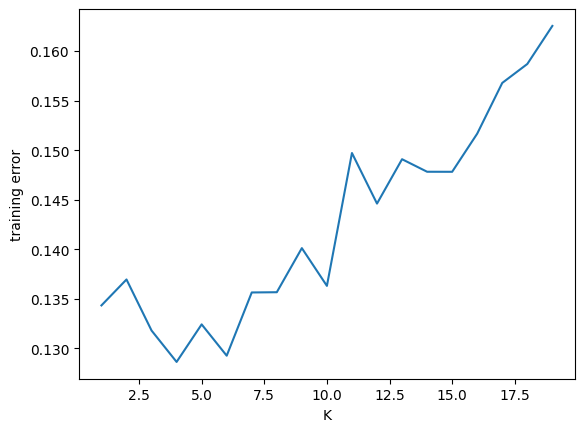

In [ ]:
import pandas as pd
import numpy as np
import math
import scipy
import csv
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

"""Data is loaded and dimensions are reduced by Chi squared test."""
# df_train = pd.read_csv(’train.csv’)
# lead = pd.get_dummies(df_resampled, columns=['increase_stock'])

# X = df_resampled.drop(columns=['increase_stock'])
# Y = lead['increase_stock']
""" Remove Zero Variance Feature and correlated feature dew"""
df_train = df_resampled.drop(columns=['dew', 'snow'])

print(pd.get_dummies(df_train, columns=['increase_stock']))

X = df_train.drop(columns=['increase_stock'])
Y = pd.get_dummies(df_train, columns=['increase_stock'])['increase_stock_high_bike_demand']

"""Scaling of the data by standardscaler, other scalers were evaluated but
StandardScaler was deemed most fitting"""

scaler = skl_pre.MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)

X_picked = SelectKBest(chi2, k=5).fit_transform(X_scaled, Y)

#scaler = skl_pre.RobustScaler().fit(X_picked)

# scaler = skl_pre.StandardScaler().fit(X_picked)


"""Splitting the data with 25% of it used for testing."""
train_X, test_X, train_Y, test_Y = train_test_split(X_scaled, Y, test_size=0.25, stratify=Y, random_state=0)
"""Hyperparameter tuning by Gridsearch"""
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
                'weights' : ['uniform','distance'],
                'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(skl_nb.KNeighborsClassifier(), grid_params)
g_res = gs.fit(train_X, train_Y)
g_res.best_params_

"""Split by StratifiedKFold(10 fold), KNN accuracy evaluated by Cross validation
for different K values."""

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(train_X, train_Y)

error_by_k = []

for k in range(1, 20, 1):
  misclassification = []
  for train_index, test_index in skf.split(train_X, train_Y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    knn = skl_nb.KNeighborsClassifier(n_neighbors=k, metric='minkowski',
    weights='uniform')
    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    misclassification.append(np.mean(predicted != y_test))
  error_by_k.append(sum(misclassification)/len(misclassification))


"""Error from the cross validation is plotted for different K values"""
print(error_by_k)
k = np.arange(1, 20, 1)
plt.plot(k, error_by_k)
plt.ylabel('training error')
plt.xlabel('K')


In [ ]:
"""KNN prediction is evaluated on the remaining 25% of the data."""
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


knn = skl_nb.KNeighborsClassifier(n_neighbors=4, metric='minkowski',
      weights='distance')
knn.fit(train_X, train_Y)
predicted = knn.predict(test_X)

acc_score = accuracy_score(test_Y, predicted)
precision = precision_score(test_Y, predicted)

cm = confusion_matrix(test_Y, predicted)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])

print(acc_score)
print(precision)
print(sensitivity)
print(specificity)

0.9078694817658349
0.8581081081081081
0.8390804597701149
0.9769230769230769
